In [12]:
!pip install seaborn
!pip install pyLDAvis
!pip install wordcloud
!pip install bertopic
!pip install statsmodels
!pip install gensim
!pip install colorcet

In [13]:
# Import libraries
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm


###############################################################################
### packages required to run code.  Make sure to install all required packages.
###############################################################################
import re,string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, KFold

import os

from wordcloud import WordCloud

from gensim.models import CoherenceModel
from gensim.corpora import Dictionary

from gensim.models import Word2Vec,LdaMulticore, TfidfModel
from gensim import corpora
from gensim import similarities


from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim import corpora
from gensim.models import LsiModel,LdaModel

import numpy as np
import pyLDAvis
import pyLDAvis.gensim
import pickle

import warnings
warnings.filterwarnings('ignore')
# Visualize the topics
pyLDAvis.enable_notebook()


import re,string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt

import pandas as pd
import os
import numpy as np
from bertopic import BERTopic
import warnings
warnings.filterwarnings('ignore')

import nltk
nltk.download('stopwords')
nltk.download('words')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [14]:
pd.set_option('display.max_colwidth', None)  # Ensure text isn't truncated
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.float_format', '{:.4f}'.format)

## Original Import with English filtering

In [ ]:
# Import for Mac

from google.colab import files
import os

from google.colab import drive
drive.mount('/content/drive'
            # ,force_remount=True
            )

os.chdir('/content/drive/My Drive')

df = pd.read_csv("Kaggle Mental Health Sentiment.csv")

Mounted at /content/drive


FileNotFoundError: [Errno 2] No such file or directory: 'Kaggle Mental Health Sentiment.csv'

In [ ]:
from google.colab import files
import pandas as pd

# Upload files from your local system
uploaded = files.upload()

# The keys of the `uploaded` dictionary are the filenames
for filename in uploaded.keys():
    print(f"User uploaded file '{filename}' with length {len(uploaded[filename])} bytes")

# Replace 'filename.csv' with the actual filename
df = pd.read_csv(filename)
print(df.head())



Saving Data.csv to Data (1).csv
User uploaded file 'Data (1).csv' with length 31521718 bytes
  Unnamed: 0                                          statement   status
0          0                                         oh my gosh  Anxiety
1          1  trouble sleeping, confused mind, restless hear...  Anxiety
2          2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3          3  I've shifted my focus to something else but I'...  Anxiety
4          4  I'm restless and restless, it's been a month n...  Anxiety


In [ ]:
df_depression=df[df['status']=='Depression']
df_depression.rename(columns={'Unnamed: 0':'ID', 'statement': 'text', 'status': 'label'},inplace=True)
df_depression.dropna(inplace=True)

<ipython-input-3-be6d29aacb2e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_depression.rename(columns={'Unnamed: 0':'ID', 'statement': 'text', 'status': 'label'},inplace=True)
<ipython-input-3-be6d29aacb2e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_depression.dropna(inplace=True)


In [ ]:
!python -m spacy download en_core_web_sm;

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 106.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
from spacy.language import Language
from spacy_langdetect import LanguageDetector
import spacy
nlp=spacy.load('en_core_web_sm')


@Language.factory("language_detector")

def get_lang_detector(nlp, name):
    return LanguageDetector()

nlp.add_pipe('language_detector', last=True)

In [ ]:
def detect_language(text):
    doc = nlp(text)
    # Check if the most common language is English
    return doc._.language['language']=='en'

In [ ]:
df_depression['is_english']=df_depression['text'].apply(detect_language)

In [ ]:
df_depression[df_depression['is_english']==False].sample(20)

ID  \
40763  40763   
41322  41322   
16405  16405   
40875  40875   
40978  40978   
40806  40806   
40586  40586   
41002  41002   
25680  25680   
40617  40617   
41353  41353   
40923  40923   
41137  41137   
41187  41187   
41086  41086   
41252  41252   
41420  41420   
40572  40572   
41175  41175   
40648  40648   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          text  \
40763                                                                                                                                                                                                 lamacurieux battle 0 copaincopain mon avis a moi aquatennens du m thane artificiel ca reste du m thane la diff rence c est qu il permet de renforcer notre ind pendance nerg tique si combin l hydro lectrique au nucl aire etc enfin le oliennes d pression n ont pa besoin de vent idem pour celles de courants marins   
41322                                                                                                                                                                                                                                                                                                  et faut aussi arr tez d avoir cette mala de dire ici que vos enfants vont forc ment sombre dans le hors mariage dans la d pression forc e si il ont subits une r gle de caste a croire que c est la seule issu possible   
16405                                                                                                                                                                                                                                                                                                                                                                                                                           UGHHHHHHHHHH UGHHHH UGH UGHHHHHH UGH UGH UGH UGH UGHHHHHHHHHHHHHHHHHHHHHHHHHHHH UGHHHHHHHHHHHH   
40875                                                                                                                                                                                                                                                                                                                                           francoispillet clemenceji ratio pour tenter de comparer un faf meurtrier qui avait de ant c dent dans l arm e de violence avec ton pote qui a fait une d pression tu e c urant   
40978                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               d pression   
40806                                                                                                                                                                                                                                                                                                                                                                                                                                                                            hatoumadks mdrrrr d pression c est petit m me   
40586                                                                      

In [ ]:
len(df_depression[df_depression['is_english']==False])

239

In [ ]:
df_depression_english=df_depression[df_depression['is_english']==True]

In [ ]:
df_depression_english.to_csv('depression_english.csv')

In [ ]:
df_depression=df_depression_english.copy()

# To skip ahead to depression_english.csv import

In [15]:
from google.colab import files
import os

from google.colab import drive
drive.mount('/content/drive'
            # ,force_remount=True
            )

os.chdir('/content/drive/My Drive/M498 Capstone')

df_depression = pd.read_csv("depression_english.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Oliver upload
from google.colab import files
import pandas as pd

# Upload files from your local system
uploaded = files.upload()

# The keys of the `uploaded` dictionary are the filenames
for filename in uploaded.keys():
    print(f"User uploaded file '{filename}' with length {len(uploaded[filename])} bytes")

# Replace 'filename.csv' with the actual filename
df_depression = pd.read_csv(filename)


Saving depression_english.csv to depression_english (2).csv
User uploaded file 'depression_english (2).csv' with length 27413188 bytes


In [ ]:
print(df_depression.columns)

Index(['Unnamed: 0', 'ID', 'text', 'label', 'tokenized_text', 'cleaned_text',
       'is_english'],
      dtype='object')


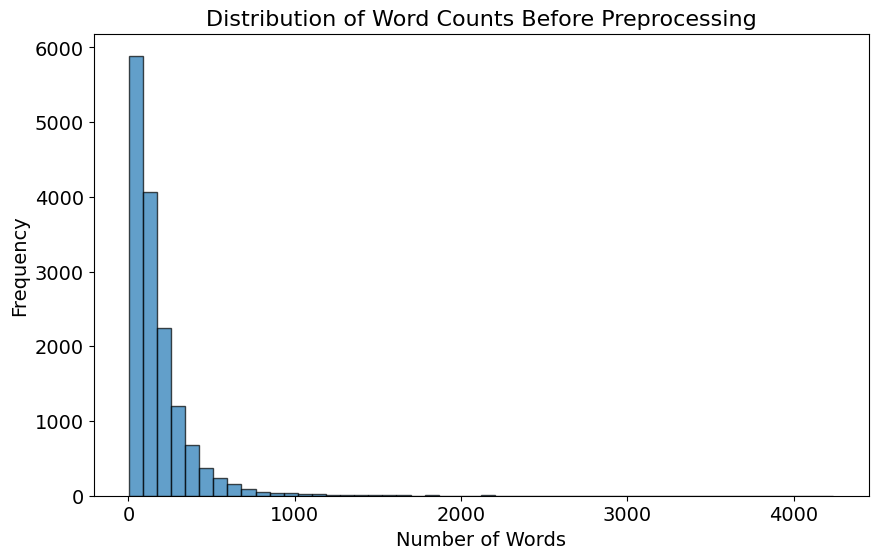

In [ ]:
#Histogram before Cleaning

# Compute word count for each row by splitting text entries into words
df_depression["word_count_before_cleaning"] = df_depression['text'].apply(lambda x: len(x.split()))

# Plot histogram of word counts before cleaning
plt.figure(figsize=(10, 6))
plt.hist(df_depression["word_count_before_cleaning"], bins=50, edgecolor="black", alpha=0.7)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Number of Words", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of Word Counts Before Preprocessing", fontsize=16)
plt.show()

In [ ]:
df_depression["word_count_before_cleaning"].describe()

count   15155.0000
mean      170.2474
std       188.5933
min         2.0000
25%        56.0000
50%       115.0000
75%       218.0000
max      4239.0000
Name: word_count_before_cleaning, dtype: float64

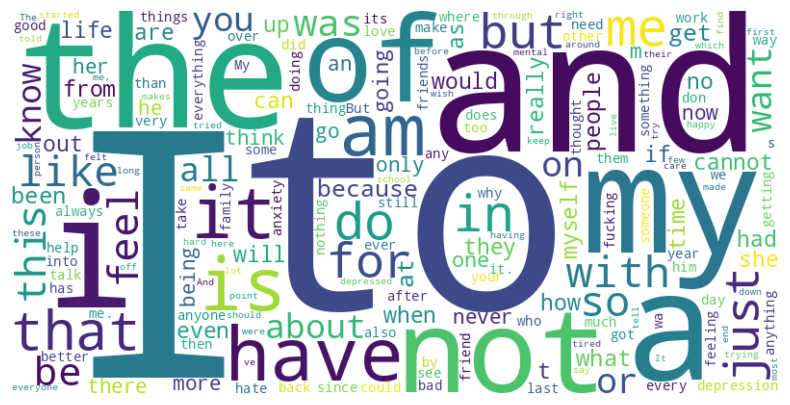

In [ ]:
#Word Cloud Before Cleaning
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Step 1: Flatten the list of texts into a single list of words
all_words = ' '.join(df_depression['text']).split()

# Step 2: Count word frequencies
word_freq = Counter(all_words)

# Step 3: Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Step 4: Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axis for a cleaner plot
plt.show()

# Subset for Manual Detection of Topics


In [ ]:
# Create a subset containing only 'ID', 'text', 'label' from the df_depression DataFrame
subset_manual_review = df_depression[['ID', 'text', 'label']].sample(n=100, random_state=42)

# Export this subset to a CSV file
subset_manual_review.to_csv('subset_manual_review.csv', index=False)  # index=False to not save row indices in the file

# Display the first few rows of the subset to verify
#print(subset_manual_review.head())

In [ ]:
from google.colab import files
files.download('/content/subset_manual_review.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Preprocessing

In [16]:
custom_stopwords = set([
    'like', 'life', 'because', 'this', 'even', 'would', 'thing', 'things',
    'really', 'just', 'very', 'so', 'quite', 'actually', 'literally', 'basically', 'almost',
    'get', 'got', 'think', 'know', 'say', 'feel', 'feeling', 'want', 'wanted', 'wants', 'wanting',
    'sometimes', 'never', 'always', 'everything', 'nothing', 'stuff',
    'im', "ive", "dont", "doesnt", "wont", "didnt", "ill", "could", "should", 'also', 'was', 'http', 'https', 'mizzzidc', 'wa',
    'theekween', 'thelmasherbs',
    'hes', 'does', 'said', 'did', 'told', 'day', 'thing', 'make',
    'amp', 'sneaker', 'shoe',
    'depress', 'depression', 'depressed',
    'do', 'don', 't', 'ha', 've',
    'really', 'time',
    'd', 'doe', 'doesn', 'na', 'didn', 's', 'm', 'll', 'haven',
    'year', 'years', 'anymore', 'go', 'goes', 'going', 'good', 'start', 'starting', 'started',
    'ago', 'month', 'months', 'week', 'weeks', 'away', 'make', 'makes', 'made', 'making', 'went',
    'use', 'used', 'user', 'uses', 'do', 'does', 'come', 'came', 'comes', 'coming', 'lot', 'lots',
    'turkish', 'tweet', 'today', 'days'
])

stop_words = list(text.ENGLISH_STOP_WORDS.union(custom_stopwords))

# # Could be useful for hashtags. Not sure we'll need to add more than this
# custom_splits = {
#     "mentalhealth": ["mental", "health"]
# }

# def split_known_compounds(word):
#     """Splits only predefined compound words from a custom dictionary."""
#     return custom_splits.get(word, [word])


def clean_doc(doc):
    #split document into individual words
    tokens=doc.split()

    # From https://www.kaggle.com/code/muhammadfaizan65/sentiment-analysis-for-mental-health-nlp
    # Remove text in square brackets
    tokens = [re.sub(r'\[.*?\]', '', w) for w in tokens]

    # Remove links (URLs)
    tokens = [re.sub(r'https?://\S+|www\.\S+', '', w) for w in tokens]

    # Remove HTML tags
    tokens = [re.sub(r'<.*?>', '', w) for w in tokens]

    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out short tokens (not sure we want to do this for abbreviations)
    # tokens = [word for word in tokens if len(word) > 3]
    #lowercase all words
    tokens = [word.lower() for word in tokens]
    # Apply custom compound word splitting
    # split_tokens = []
    # for word in tokens:
    #     split_tokens.extend(split_known_compounds(word))
    # filter out stop words
    tokens = [w for w in tokens if not w in stop_words]
    # word stemming
    ps=PorterStemmer()
    tokens=[ps.stem(word) for word in tokens]


    return tokens

def final_processed_text(doc):
    #this is a function to join the processed text back
    ' '.join(doc)
    return doc

In [17]:
#Mentalhealth is a common hashtag. Split the words
df_depression["text"] = df_depression["text"].apply(lambda x: re.sub(r"(?i)mentalhealth", "mental health", x))

#adding two columns to the dataframe to store the processed text and tokenized text
df_depression['tokenized_text'] = df_depression['text'].apply(lambda x: clean_doc(x))
df_depression['cleaned_text'] = df_depression['tokenized_text'].apply(lambda x: ' '.join(x))


print(len(df_depression))

#Delete records where cleaned_text is empty
df_depression = df_depression[df_depression['cleaned_text'] != '']

# This is a nonsense record. Does not appear to be related to depression
df_depression = df_depression[df_depression['ID'] != 41357]

# Posts from moderators about the subreddits. Not necessarily what we are looking for
df_depression = df_depression[~df_depression['ID'].isin([48062, 47087, 47086, 37663, 37664, 39579])]

# Delete these nftgiveaway posts
df_depression = df_depression[~df_depression['tokenized_text'].apply(lambda tokens: 'nftgiveaway' in tokens)]


print(len(df_depression))

df_depression.reset_index(drop=True, inplace=True)

#creating final processed text variables for matrix creation
final_processed_text = [' '.join(x) for x in df_depression['tokenized_text'].tolist()]
titles = df_depression['ID'].tolist()
cleaned_text = df_depression['tokenized_text'].tolist()

15155
15135


## Exploratory Data Analysis

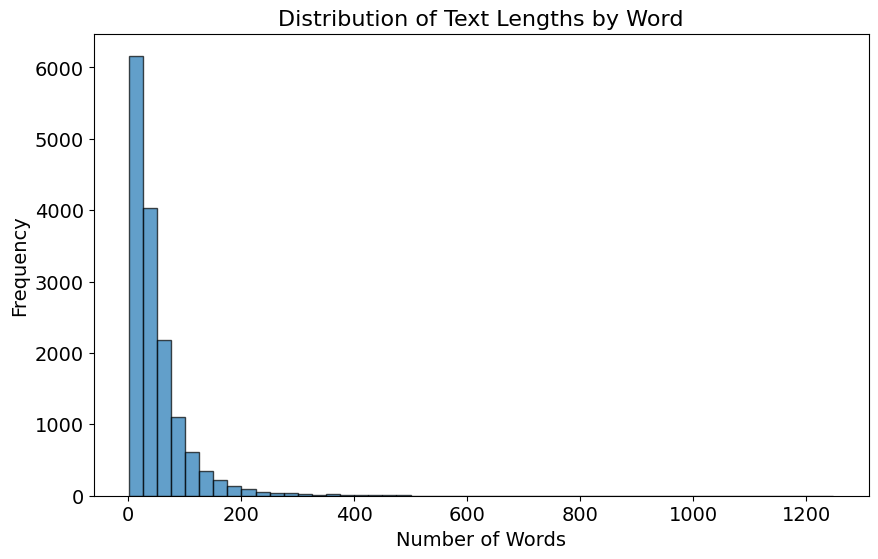

In [7]:
import matplotlib.pyplot as plt

# Compute character length for each row
df_depression["word_count"] = df_depression['tokenized_text'].str.len()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df_depression["word_count"], bins=50, edgecolor="black", alpha=0.7)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Number of Words", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of Text Lengths by Word", fontsize=16)
plt.show()


In [8]:
df_depression["word_count"].describe()

count   15135.0000
mean       48.8974
std        55.3793
min         1.0000
25%        16.0000
50%        33.0000
75%        62.0000
max      1248.0000
Name: word_count, dtype: float64

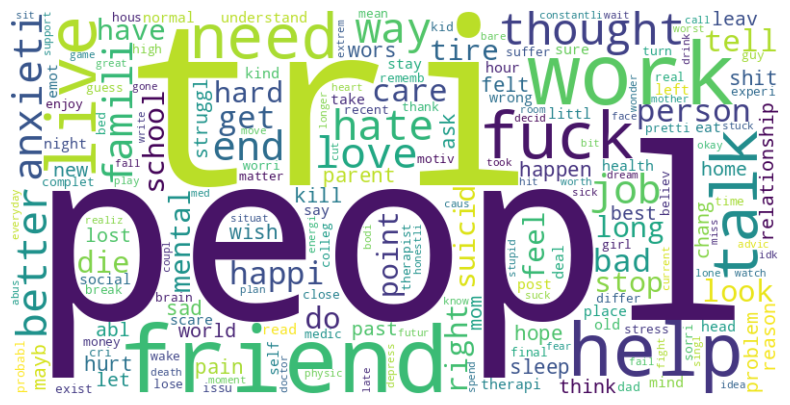

In [9]:
# I think a word cloud would go well here

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Step 1: Flatten the list of lists
all_tokens = [token for doc in cleaned_text for token in doc]

# Step 2: Count word frequencies
word_freq = Counter(all_tokens)

# Step 3: Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Step 4: Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axis for a cleaner plot
plt.show()


In [ ]:
# Look for weird instances ("gp")
df_depression[df_depression['tokenized_text'].apply(lambda tokens: 'gp' in tokens)]


Unnamed: 0     ID  \
86           7132   7132   
376          7781   7781   
819          8637   8637   
871          8737   8737   
1420         9813   9813   
1482         9969   9969   
1862        10728  10728   
2183        11369  11369   
3344        13769  13769   
3634        14347  14347   
4128        15305  15305   
4811        16613  16613   
5269        17476  17476   
6747        20213  20213   
6788        20293  20293   
7066        20805  20805   
8792        24232  24232   
8901        24463  24463   
9100        24870  24870   
9469        25589  25589   
9508        25661  25661   
10114       26930  26930   
10201       27096  27096   
10800       38133  38133   
11021       38355  38355   
11285       38620  38620   
11362       38697  38697   
11518       38855  38855   
11589       38926  38926   
12103       39446  39446   
12439       39790  39790   
13485       40921  40921   
13714       41203  41203   
14137       47268  47268   
14822       47953  47953   
15110       48243  48243   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

## Topic Modeling

### BERTopic

In [11]:
pip install --upgrade BERTopic numba


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 18.0 MB/s eta 0:00:00
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.43.0
    Uninstalling llvmlite-0.43.0:
      Successfully uninstalled llvmlite-0.43.0
  Attempting uninstall: numba
    Found existing installation: numba 0.60.0
    Uninstalling numba-0.60.0:
      Successfully uninstalled numba-0.60.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 25.2.1 requires numba<0.61.0a0,>=0.59.1, but you have numba 0.61.0 which is incompatible.
dask-cuda 25.2.0 requires numba<0.61.0a0,>=0.59.1, but you have numba 0.61.0 which is incompatible.
cuml-cu12 25.2.1 requires numba<0.61.0a0,>=0.59.1, but you have numba 0.61.0 which is incompatible.
distributed-ucxx-cu12 0.42.0 requires numba<0.61.0a0,>=

In [18]:
from bertopic import BERTopic

model_path = "/content/drive/My Drive/M498 Capstone/best_bertopic_model"

try:
    topic_model = BERTopic.load(model_path)
    print("Model loaded successfully!")
except Exception as e:
    print("Error:", e)

# Need to get probs here
probs = topic_model.probabilities_

Model loaded successfully!


In [ ]:
# # Only need to run this portion if BERTopic model needs to be retrained

# from bertopic import BERTopic
# from sentence_transformers import SentenceTransformer
# from sklearn.feature_extraction.text import CountVectorizer

# # embedding_model = SentenceTransformer("all-mpnet-base-v2")
# embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# # Step 2: Custom vectorizer
# vectorizer = CountVectorizer(
#     stop_words=stop_words  # You can add your custom stopwords here
#     # ngram_range=(1, 2)  # Bigrams to capture phrases
# )

# topic_model = BERTopic(
#     min_topic_size=100,        # Adjust this to balance topic granularity
#     vectorizer_model=vectorizer,  # Custom vectorizer for better stopword removal
#     # embedding_model=embedding_model,  # Embedding model for textual embeddings
#     verbose=True,  # Set this to True to see progress
#     calculate_probabilities=True
#     )

# topics, probs = topic_model.fit_transform(df_depression["text"])

2025-02-26 01:02:50,145 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/473 [00:00<?, ?it/s]

2025-02-26 01:02:59,557 - BERTopic - Embedding - Completed ✓
2025-02-26 01:02:59,558 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-02-26 01:03:03,116 - BERTopic - Dimensionality - Completed ✓
2025-02-26 01:03:03,117 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-02-26 01:03:04,793 - BERTopic - Cluster - Completed ✓
2025-02-26 01:03:04,799 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-02-26 01:03:06,289 - BERTopic - Representation - Completed ✓


In [ ]:
topic_info = topic_model.get_topic_info()
topic_info

Topic  Count                                Name  \
0      -1   8969          -1_people_help_work_better   
1       0    839            0_mom_dad_family_parents   
2       1    760     1_therapy_help_therapist_better   
3       2    733        2_friends_people_talk_friend   
4       3    703              3_die_kill_live_people   
5       4    632      4_mental_anxiety_people_health   
6       5    506      5_anxiety_panic_attack_anxious   
7       6    461  6_taking_anxiety_zoloft_medication   
8       7    405     7_relationship_love_friend_girl   
9       8    374           8_job_college_school_work   
10      9    287  9_help_love_relationship_boyfriend   
11     10    186      10_motivation_games_enjoy_work   
12     11    158          11_hate_people_person_self   
13     12    122       12_drinking_drink_sober_drunk   

                                                                                        Representation  \
0                                  [people, help, work, better, hate, way, friends, job, need, family]   
1                              [mom, dad, family, parents, mother, friend, help, people, tell, school]   
2                     [therapy, help, therapist, better, work, people, thoughts, bad, crying, getting]   
3                           [friends, people, talk, friend, lonely, person, social, group, need, love]   
4                                  [die, kill, live, people, death, suicide, pain, end, world, living]   
5                      [mental, anxiety, people, health, great, illness, real, twitter, new, disorder]   
6                          [anxiety, panic, attack, anxious, symptom, heart, chest, having, fear, bad]   
7   [taking, anxiety, zoloft, medication, antidepressants, lexapro, effects, doctor, prescribed, meds]   
8                         [relationship, love, friend, girl, felt, person, friends, best, help, happy]   
9                       [job, college, school, work, money, parents, degree, university, people, hard]   
10                       [help, love, relationship, boyfriend, friend, talk, guy, right, trying, best]   
11                          [motivation, games, enjoy, work, doing, game, bored, video, play, working]   
12                                  [hate, people, person, self, shit, way, bad, better, care, hatred]   
13                         [drinking, drink, sober, drunk, alcohol, night, people, job, work, getting]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [23]:
topic_model.get_topics()

{-1: [('people', 0.023197767201838516),
  ('help', 0.015459786661823452),
  ('work', 0.015274558305305568),
  ('better', 0.014394361519806208),
  ('hate', 0.014024015582035648),
  ('way', 0.01375016105402738),
  ('friends', 0.013273223474915222),
  ('job', 0.01295766273754072),
  ('need', 0.012638595141700558),
  ('family', 0.012523389286130312)],
 0: [('mom', 0.028574934027649476),
  ('dad', 0.022949924312960907),
  ('family', 0.02038978049498918),
  ('parents', 0.019739127284928146),
  ('mother', 0.017934440014740132),
  ('friend', 0.01641193370166039),
  ('help', 0.016272959429592122),
  ('people', 0.015156311871948713),
  ('tell', 0.01472453263726811),
  ('school', 0.014653593309418346)],
 1: [('therapy', 0.0291222966761542),
  ('help', 0.022096488745261857),
  ('therapist', 0.02105372687852299),
  ('better', 0.018912667243942877),
  ('work', 0.017366261797547692),
  ('people', 0.01623379041469831),
  ('thoughts', 0.015636478217457426),
  ('bad', 0.014821961032582381),
  ('crying',

In [24]:
topic_model.visualize_barchart(top_n_topics=30)

In [25]:
topic_model.visualize_hierarchy()

In [26]:
topic_model.visualize_topics()

In [27]:
df_depression.head()

Unnamed: 0    ID  \
0        6982  6982   
1        6983  6983   
2        6984  6984   
3        6986  6986   
4        6988  6988   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         I recently went through a breakup and she said she still wants to be friends so I said I can try doing that but when she talks to me about things it always hurts. I just want to lose feelings so all this pain can stop it hurts so much and I cannot even cry about it. I do not want to hurt her because she said she does not want to never speak to me again but I do not know what to do here. When we were together she always hurt me so I do not know why I still love her. I wish we never met it would be much less painful How do I lose feelings?   
1  I do not know how to navigate these feelings, not that its a new feeling by any stretch. I just do not understand how I can go on from being so pleasantly fine to suicidal and self loathing within in minutes and not be able to step out of it. I have been suffering from poor mental health for over 10 years and I am about to turn 26 next week and I feel so ashamed for how serious my negative thoughts are. Covid was a hard transition especially having moved to a new city a few months before everything started locking down, but now I am here and settled and I have a loving partner, a great connection to their family, a really fun job and I finished my degree. But when I stop and look around I feel like nothing will ever be good enough for me and I will never be good enough, I will always have skin problems and bad teeth

In [28]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary

# Assuming `topic_model` is already your trained BERTopic model
# and `df_depression` contains the raw text data in a column called 'text'

# Step 1: Get topics from BERTopic
topics = topic_model.get_topics()

# Step 2: Tokenize your raw text (using word_tokenize from NLTK as discussed)
# Tokenizing raw text
tokenized_texts = [nltk.word_tokenize(doc) for doc in df_depression["text"]]

# Step 3: Create a Gensim dictionary from your tokenized texts
dictionary = Dictionary(tokenized_texts)

# Step 4: Prepare the list of words for each topic (from BERTopic)
topic_words = [[word for word, _ in topic] for topic in topics.values()]

# Step 5: Create a Gensim CoherenceModel
coherence_model = CoherenceModel(
    topics=topic_words,
    texts=tokenized_texts,
    dictionary=dictionary,
    coherence='c_v'  # You can also use 'u_mass', 'c_v', etc.
)

# Step 6: Get the coherence score
coherence_score = coherence_model.get_coherence()

print(f"Coherence Score: {coherence_score}")


Coherence Score: 0.4744163202984992


In [29]:
topic_model.get_document_info(df_depression["text"])["Topic"]

0         7
1         8
2         9
3         2
4        11
         ..
15130    -1
15131    -1
15132    -1
15133    -1
15134     1
Name: Topic, Length: 15135, dtype: int64

In [30]:
# Join in assigned clusters
df_depression = df_depression.reset_index(drop=True)
df_depression["BERT_cluster"] = topic_model.get_document_info(df_depression["text"])["Topic"].values
df_depression.head()

Unnamed: 0    ID  \
0        6982  6982   
1        6983  6983   
2        6984  6984   
3        6986  6986   
4        6988  6988   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         I recently went through a breakup and she said she still wants to be friends so I said I can try doing that but when she talks to me about things it always hurts. I just want to lose feelings so all this pain can stop it hurts so much and I cannot even cry about it. I do not want to hurt her because she said she does not want to never speak to me again but I do not know what to do here. When we were together she always hurt me so I do not know why I still love her. I wish we never met it would be much less painful How do I lose feelings?   
1  I do not know how to navigate these feelings, not that its a new feeling by any stretch. I just do not understand how I can go on from being so pleasantly fine to suicidal and self loathing within in minutes and not be able to step out of it. I have been suffering from poor mental health for over 10 years and I am about to turn 26 next week and I feel so ashamed for how serious my negative thoughts are. Covid was a hard transition especially having moved to a new city a few months before everything started locking down, but now I am here and settled and I have a loving partner, a great connection to their family, a really fun job and I finished my degree. But when I stop and look around I feel like nothing will ever be good enough for me and I will never be good enough, I will always have skin problems and bad teeth

In [31]:
df_clusters = topic_model.get_document_info(df_depression["text"])
df_clusters.sample(20, random_state=42)  # See detailed topic assignments

Document  \
566                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             I am lonely I made that very clear to her. An Acquaintance texted me an all of a sudden I am not lonely anymore she thinks she knows me so well but she has never met the real me. I have the biggest hopes and dreams and I do not feel like I can achieve them they are starting to fade away just like my personality. I know this is all over the place. But please send help. My mom downplays my depression   
10650                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          i talk to myself for like minute sometimes this so intense that i my hand gesture too there is always a intervention from my brain asking what am i doing this happens when i am stressed with some hypothetical issue which probably will never occur for example what if i park my vehicle in a spot how will my neighbor react if i some what unknowingly encroach on his parking spot if this scenario play out then what would be my reaction this issue i just make some hypothetical scenario about my interaction with my neighbor and how would i react to this so called dispute there will be several different scenario playing my mind with realte to this example please help me if this related to adhd and if yes how severe is this if not adhd then what is this   
7660                                                                                                                                                                                                                                                                      

In [32]:
# Manually review topic probability scores

# Convert probabilities into a DataFrame
probs_df = pd.DataFrame(probs)

# Show the first few rows of the probabilities
probs_df.head()

0      1      2      3      4      5      6      7      8      9   \
0 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000 0.0000   
1 0.0578 0.0446 0.0434 0.0505 0.0263 0.0354 0.0279 0.0384 0.2898 0.0324   
2 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 1.0000   
3 0.0512 0.0388 0.2186 0.0366 0.0234 0.0244 0.0212 0.0547 0.0492 0.0418   
4 0.0086 0.0111 0.0190 0.0150 0.0066 0.0062 0.0052 0.0083 0.0095 0.0075   

      10     11     12  
0 0.0000 0.0000 0.0000  
1 0.1038 0.0512 0.0437  
2 0.0000 0.0000 0.0000  
3 0.0396 0.0878 0.0330  
4 0.0100 0.8615 0.0079

### Manually reviewing groups

#### Group -1 (Outliers)
Notes: Some of these definitely look like they could have been classified into one of the pre-existing groups. And even looking at their probability distribution, their highest probability is often not in the category I'd expect. This is very interesting. I want to see how well it classified non-outliers

In [ ]:
df_depression[df_depression['BERT_cluster']==-1].sample(n=50, random_state=42)

Unnamed: 0     ID  \
4371        15764  15764   
959          8949   8949   
4905        16781  16781   
14051       47182  47182   
12598       39955  39955   
11806       39146  39146   
9749        26136  26136   
3590        14263  14263   
14322       47453  47453   
5980        18822  18822   
9258        25207  25207   
8426        23508  23508   
9482        25615  25615   
14155       47286  47286   
15028       48161  48161   
7692        22087  22087   
5737        18392  18392   
14469       47600  47600   
7537        21758  21758   
2920        12883  12883   
6820        20364  20364   
6920        20529  20529   
1206         9427   9427   
14186       47317  47317   
2822        12679  12679   
6748        20215  20215   
9714        26068  26068   
4261        15547  15547   
13086       40448  40448   
150          7249   7249   
8489        23631  23631   
8315        23304  23304   
4970        16900  16900   
15056       48189  48189   
3556        14204  14204   
10657       37988  37988   
455          7911   7911   
6986        20660  20660   
8970        24619  24619   
9627        25890  25890   
1730        10488  10488   
13434       40866  40866   
302          7617   7617   
9143        24956  24956   
10946       38280  38280   
10714       38046  38046   
6668        20052  20052   
1801        10624  10624   
15099       48232  48232   
7742        22173  22173   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [ ]:
df_depression[df_depression.index==9482]

Unnamed: 0     ID  \
9482       25615  25615   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      text  \
9482  My roommate and I use to date but we broke up a couple of months after we moved in together. We get along fine and are still good friends. But only after 2 weeks of our break up, she already moved on and found someone to call her bf. I am fine with her breaking up with me. It just hurts that she is already dating and it makes me feel like we never had love to begin with. She tries to give me help and advice about love but then she contradicts herself by doing something that is the opposite of what she told me. It makes me question if I was truly loved or if I will ever be able to form a relationship with someone. And she wants me to talk to her bf when she brings her over. He is a nice guy and I there is nothing wrong with. I just do not want to talk to him because of the situation with me and my roommate.And it just makes it even more awkward when she asks me to leave the apartment for a while so they can fuck when she knows damn well I have nowhere to go. She is a good friend and her bf is good person, but fuck I cannot stand their relationship. My roommate is messing with my view on love.   

           label  \
9482  Depression   

                                                                                                                                                                                                                                                                                                                                                                                      tokenized_text  \
9482  [roommat, date, broke, coupl, move, fine, friend, break, move, bf, fine, break, hurt, date, love, begin, tri, help, advic, love, contradict, do, opposit, question, truli, love, abl, form, relationship, talk, bf, bring, nice, guy, wrong, talk, situat, roommateand, awkward, ask, leav, apart, fuck, know, damn, friend, bf, person, fuck, stand, relationship, roommat, mess, view, love]   

                                                                                                                                                                                                                                                                                                                                cleaned_text  \
9482  roommat date broke coupl move fine friend break move bf fine break hurt date love begin tri help advic love contradict do opposit question truli love abl form relationship talk bf bring nice guy wrong talk situat roommateand awkward ask leav apart fuck know damn friend bf person fuck stand relationship roommat mess view love   

      is_english  BERT_cluster  
9482        True       -1.0000

In [ ]:
# -1. Outlier Group
# 0. Relationships (Family)
# 1. Therapy
# 2. Relationships (Friends, General Lonliness)
# 3. Self-Harm/Suicidal Thoughts
# 4. General Mental Health (Tweets Cluster)
# 5. Anxiety
# 6. Medication
# 7. Relationships (Romantic, Female Focused)
# 8. Work/School
# 9. Relationships (Romantic, Male Focused)
# 10. Motivation/Video Games
# 11. Anger/Hatred
# 12. Substance Use/Abuse



# Looking up probabilities for some of these. Some seem like they should have been classified
probs_df[probs_df.index.isin([4905, 14051, 12598, 11806, 9749, 3590, 5980, 8426, 9482])]



0      1      2      3      4      5      6      7      8      9   \
3590  0.0592 0.0794 0.0514 0.0524 0.0420 0.0548 0.0464 0.0393 0.1020 0.0386   
4905  0.0342 0.0453 0.0357 0.0358 0.0401 0.0476 0.0398 0.0253 0.0506 0.0250   
5980  0.0338 0.0599 0.0717 0.1171 0.0312 0.0270 0.0235 0.0319 0.0393 0.0298   
8426  0.0311 0.0664 0.0326 0.0250 0.0259 0.0264 0.0264 0.0224 0.0326 0.0246   
9482  0.0524 0.0421 0.0360 0.0444 0.0241 0.0360 0.0270 0.0325 0.2310 0.0286   
9749  0.0381 0.1455 0.0603 0.0417 0.0585 0.0376 0.0395 0.0315 0.0387 0.0351   
11806 0.0676 0.0541 0.0370 0.0418 0.0260 0.0572 0.0355 0.0345 0.0703 0.0344   
12598 0.0419 0.1140 0.0569 0.0963 0.0682 0.0479 0.0440 0.0344 0.0524 0.0351   
14051 0.2056 0.0651 0.0589 0.0324 0.0241 0.0351 0.0286 0.0612 0.0743 0.0544   

          10     11     12  
3590  0.2383 0.0518 0.0706  
4905  0.1301 0.0360 0.0408  
5980  0.0519 0.2028 0.0377  
8426  0.0422 0.0287 0.0475  
9482  0.0935 0.0434 0.0440  
9749  0.0537 0.0506 0.0572  
11806 0.0504 0.0407 0.0695  
12598 0.0917 0.0680 0.0627  
14051 0.0418 0.0442 0.0476

### Group 3 (Self-Harm/Suicidal Thoughts)
Notes: Goal is to determine if external harm is included here as well. Somewhat unclear. Again, these classifications seem far from perfect I think we should keep this focused to self-harm. That seems to be the primary theme

In [ ]:
df_depression[df_depression['BERT_cluster']==3].sample(n=50, random_state=42)

Unnamed: 0     ID  \
9605        25858  25858   
3496        14093  14093   
1043         9143   9143   
12401       39761  39761   
12653       40019  40019   
7069        20813  20813   
7120        20917  20917   
14439       47588  47588   
12406       39766  39766   
6174        19164  19164   
6971        20639  20639   
12606       39972  39972   
10170       27046  27046   
11243       38585  38585   
2915        12868  12868   
5861        18626  18626   
2886        12802  12802   
1819        10659  10659   
1925        10857  10857   
14108       47256  47256   
8480        23618  23618   
12877       40245  40245   
8434        23529  23529   
10116       26937  26937   
7527        21745  21745   
13090       40461  40461   
1715        10456  10456   
9173        25018  25018   
5613        18152  18152   
14341       47489  47489   
6759        20248  20248   
6508        19760  19760   
2995        13039  13039   
1522        10066  10066   
9509        25672  25672   
4724        16459  16459   
2651        12349  12349   
12865       40233  40233   
10751       38089  38089   
12591       39957  39957   
12973       40344  40344   
6200        19201  19201   
8057        22826  22826   
14283       47431  47431   
1729        10486  10486   
14062       47210  47210   
9971        26623  26623   
6597        19919  19919   
12373       39732  39732   
14110       47258  47258   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

### Group 4 (General Mental Health (Tweets))
Notes: I think this is almost just a catchall group for shorter posts that the model doesn't know how to classify, but there are enough for the model to consider it a subgroup

In [20]:
# Group 4 looks a little odd. Reviewing
df_depression[df_depression['BERT_cluster']==4].sample(10, random_state=42)

Unnamed: 0     ID  \
13497       40949  40949   
13364       40795  40795   
13867       41408  41408   
13191       40584  40584   
13754       41273  41273   
13604       41081  41081   
13227       40627  40627   
10596       37931  37931   
13814       41346  41346   
13224       40624  40624   

                                                                                                                                                                                                                                                                                text  \
13497                                                                                                                                                                                        balqeesabd people that are mad they don too abuse mental health and depression too much   
13364                                                                                                                                                                                                                                       mizzzidc u deserve that depression truly   
13867                                     mizzzidc you just dragged your mum in the mud over a sneaker and you talk about depression y all know how to throw this word around carelessly don t you making those who are really depressed look like fool when y all are the real fool   
13191  new article from obmintegrativeandcomplementarymedicine covid on the brain anxiety sensitivity and mindful awareness mediate the relationship between covid 9 obsession and anxiety http t co vfegm9dpzf http t co wkkexnjdys covid 9 anxiety depression http t co u pembdvcm   
13754                                                                                                                                                                                                            mizzzidc this isn t real if it s real your depression is warming up   
13604   adhd alien i truly despise that notion for exactly that reason i don t believe it bear any truth of course someone else can love you when you don t love yourself i have so much love for people close to me regardless of their depression and self loathing and vice versa   
13227                                                 tolu pepper my dear ovulation pm and period make my life complicated the depression symptom emotional weariness edginess tiredness actual pain it s just a lot you are not alone si we are all frustrated with you sending hug   
10596                                                                                                                                         i choosed depression out of my own choice i wonder if others are like this or most are just victim of life please answer your response   
13814                                                                                         trauma is real depression is real don t underestimate them but also don t underestimate the power of allah to treat them anti depressant don t do anything compared to what god can do   
13224                                                                                                                                                                                                              utdcynical crossydailystar fan got depression watching the bollox   

            label  \
13497  Depression   
13364  Depression   
13867  Depression   
13191  Depression   
13754  Depression   
13604  Depression   
13227  Depression   
10596  Depression   
13814  Depression   
13224  Depression   

                                                                                                                                                                              tokenized_text  \
13497                                                                                                                                         [balqeesabd, peopl, mad, abus, mental, health]   
1

In [36]:
# Define cluster labels
cluster_labels = {
    0: "Relationships (Family)",
    1: "Therapy",
    2: "Relationships (Friends, General Loneliness)",
    3: "Self-Harm/Suicidal Thoughts",
    4: "General Mental Health (Tweets Cluster)",
    5: "Anxiety",
    6: "Medication",
    7: "Relationships (Romantic, Female Focused)",
    8: "Work/School",
    9: "Relationships (Romantic, Male Focused)",
    10: "Motivation, Video Games",
    11: "Anger/Hatred",
    12: "Substance Use"
}

# Assuming df_depression is already defined with 'text' and 'BERT_cluster' columns
df_depression['text_length'] = df_depression['text'].apply(lambda x: len(x.split()))  # Count words

# Group by BERT cluster and calculate mean text length
avg_text_length = df_depression.groupby('BERT_cluster')['text_length'].mean().reset_index()

# Map numerical clusters to their corresponding labels
avg_text_length['BERT_cluster_label'] = avg_text_length['BERT_cluster'].map(cluster_labels)

# Reorder columns for clarity
avg_text_length = avg_text_length[['BERT_cluster', 'BERT_cluster_label', 'text_length']]

# Display results
avg_text_length


BERT_cluster                           BERT_cluster_label  text_length
0             -1                                          NaN     167.8843
1              0                       Relationships (Family)     320.7390
2              1                                      Therapy     169.3908
3              2  Relationships (Friends, General Loneliness)     143.6630
4              3                  Self-Harm/Suicidal Thoughts      75.4438
5              4       General Mental Health (Tweets Cluster)      28.5807
6              5                                      Anxiety     151.5356
7              6                                   Medication     127.5336
8              7     Relationships (Romantic, Female Focused)     292.6667
9              8                                  Work/School     244.7353
10             9       Relationships (Romantic, Male Focused)     255.5331
11            10                      Motivation, Video Games     151.3817
12            11                                 Anger/Hatred     101.4684
13            12                                Substance Use     249.0738

### Group 5 (Anxiety)
Notes: Want to see if there is physical symptoms. Yes it does include physical symptoms. Anxiety and physical symptoms seem extremely comorbid

In [ ]:
df_depression[df_depression['BERT_cluster']==5].sample(50, random_state=42)

Unnamed: 0     ID  \
11522       38859  38859   
11759       39099  39099   
13233       40622  40622   
10425       37754  37754   
11835       39175  39175   
10650       37981  37981   
12217       39560  39560   
11414       38749  38749   
12207       39550  39550   
14632       47763  47763   
11631       38969  38969   
1107         9261   9261   
12226       39569  39569   
10725       38057  38057   
11878       39218  39218   
11853       39193  39193   
11376       38711  38711   
12008       39349  39349   
11569       38906  38906   
12151       39494  39494   
11755       39095  39095   
11771       39111  39111   
4701        16415  16415   
14672       47803  47803   
12089       39432  39432   
12147       39490  39490   
10746       38078  38078   
11868       39208  39208   
11617       38955  38955   
14106       47237  47237   
11517       38854  38854   
12166       39509  39509   
11984       39325  39325   
11948       39288  39288   
13974       47104  47104   
11450       38785  38785   
662          8316   8316   
11898       39238  39238   
11609       38946  38946   
10449       37778  37778   
14016       47147  47147   
12158       39501  39501   
11597       38934  38934   
9389        25445  25445   
11304       38639  38639   
11821       39161  39161   
4857        16694  16694   
9589        25811  25811   
12204       39547  39547   
235          7442   7442   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

### Group 10 (Motivation/Video Games)
Notes: Intersted in this overlap. Also want to see if these capture anhedonia. Don't think we are going to be able to include anhedonia

In [ ]:
df_depression[df_depression['BERT_cluster']==10].sample(50, random_state=42)

Unnamed: 0     ID  \
7451        21588  21588   
11136       38470  38470   
11743       39082  39082   
6282        19357  19357   
6170        19151  19151   
1085         9219   9219   
14430       47561  47561   
2657        12367  12367   
7864        22433  22433   
9816        26265  26265   
1933        10875  10875   
4616        16246  16246   
10446       37775  37775   
7756        22199  22199   
4392        15811  15811   
1125         9290   9290   
8017        22750  22750   
2301        11628  11628   
8947        24550  24550   
1585        10190  10190   
4605        16227  16227   
7612        21927  21927   
8167        23026  23026   
9669        25983  25983   
4397        15828  15828   
775          8542   8542   
8508        23664  23664   
8965        24601  24601   
1561        10148  10148   
11164       38498  38498   
14358       47489  47489   
13996       47126  47126   
2792        12628  12628   
7375        21440  21440   
2981        13005  13005   
4382        15786  15786   
10845       38178  38178   
2219        11441  11441   
8056        22818  22818   
8898        24455  24455   
9754        26145  26145   
2341        11716  11716   
920          8858   8858   
2790        12624  12624   
3523        14138  14138   
4044        15161  15161   
5622        18162  18162   
5481        17926  17926   
4376        15774  15774   
2670        12390  12390   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [ ]:
#OP
# Select a document to visualize(first doc)
selected_probs = probs_df.iloc[0].values

# Visualize the distribution of topics for the first document
topic_model.visualize_distribution(selected_probs, min_probability=0)

Generating embeddings...


Embedding Progress: 100%|██████████| 15135/15135 [00:00<00:00, 2536289.55it/s]


Reducing dimensions with t-SNE...


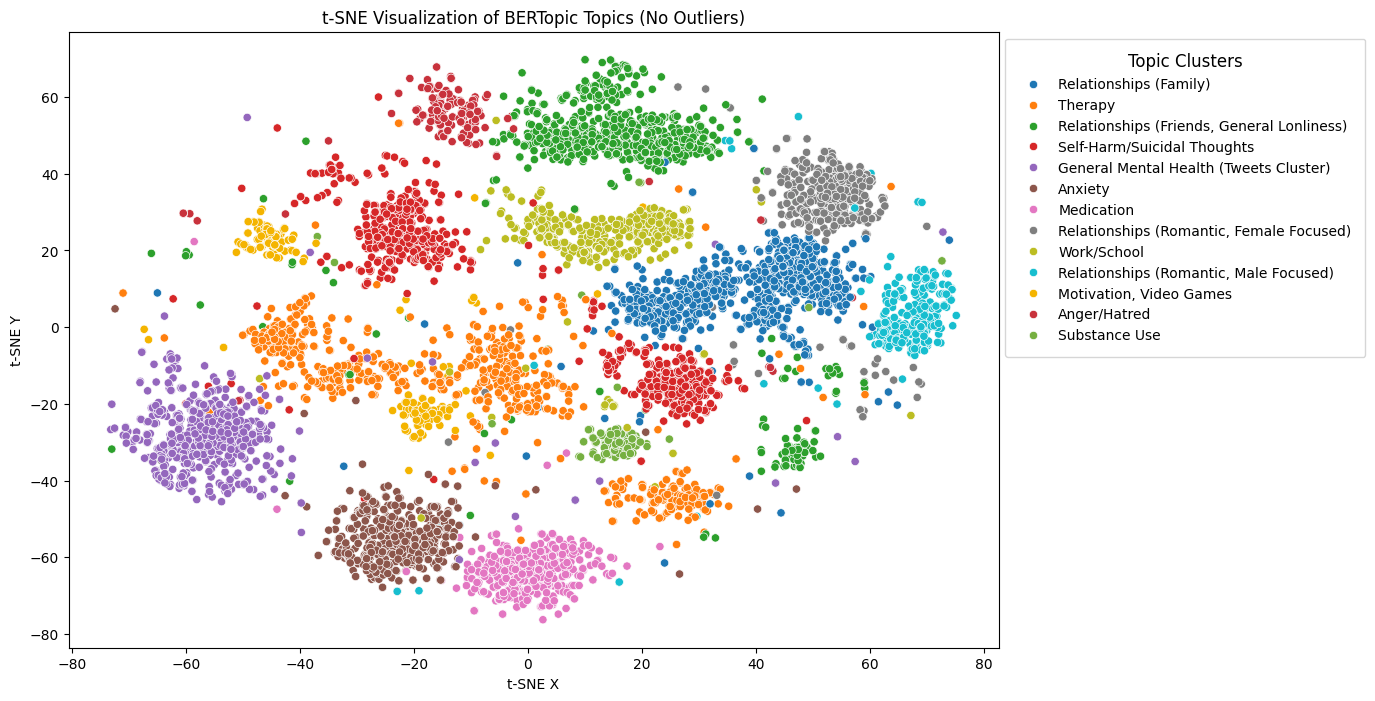

In [ ]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Apply tqdm for progress tracking
tqdm.pandas()

# Reduce dimensionality for visualization with a progress bar
print("Generating embeddings...")
embeddings = topic_model.embedding_model.embed(list(tqdm(df_depression['text'], desc="Embedding Progress")))

# Apply t-SNE with progress tracking
print("Reducing dimensions with t-SNE...")
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(embeddings)

# Get topic numbers assigned to each document
topic_labels = np.array(topic_model.topics_)

# Mask out documents assigned to topic -1
valid_indices = topic_labels != -1
filtered_embeddings = reduced_embeddings[valid_indices]  # Keep only non-outlier embeddings
filtered_labels = topic_labels[valid_indices]  # Keep only valid topic labels

# Create a DataFrame for seaborn visualization
df_tsne = pd.DataFrame(filtered_embeddings, columns=["X", "Y"])
df_tsne["Topic"] = filtered_labels

tab13_colors = [
    "#1F77B4", "#FF7F0E", "#2CA02C", "#D62728", "#9467BD",
    "#8C564B", "#E377C2", "#7F7F7F", "#BCBD22", "#17BECF",
    "#F4B400", "#C8323C", "#76B041"
]

cluster_labels = {
    0: "Relationships (Family)",
    1: "Therapy",
    2: "Relationships (Friends, General Lonliness)",
    3: "Self-Harm/Suicidal Thoughts",
    4: "General Mental Health (Tweets Cluster)",
    5: "Anxiety",
    6: "Medication",
    7: "Relationships (Romantic, Female Focused)",
    8: "Work/School",
    9: "Relationships (Romantic, Male Focused)",
    10: "Motivation, Video Games",
    11: "Anger/Hatred",
    12: "Substance Use"
}

# Plot the t-SNE visualization
plt.figure(figsize=(12, 8))
sns.scatterplot(x="X", y="Y", hue=df_tsne["Topic"], palette=tab13_colors, data=df_tsne)
plt.title("t-SNE Visualization of BERTopic Topics (No Outliers)")
plt.xlabel("t-SNE X")
plt.ylabel("t-SNE Y")

handles, labels = plt.gca().get_legend_handles_labels()
labels = [cluster_labels[int(label)] for label in labels]
plt.legend(handles, labels, title="Topic Clusters", bbox_to_anchor=(1, 1),
           title_fontsize='large', fontsize='medium', ncol=1, borderpad=1)
plt.show()

In [ ]:
# Only run if we need to save a new model
# topic_model.save("best_bertopic_model")


2025-02-21 22:43:09,037 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


#### Most Representative Documents

In [ ]:
topic_assignments, _ = topic_model.transform(df_depression['text'].tolist())

Batches:   0%|          | 0/473 [00:00<?, ?it/s]

In [ ]:
from sentence_transformers import SentenceTransformer

embedding_model = SentenceTransformer("all-MiniLM-L6-v2")  # Use the same model you initialized BERTopic with
document_embeddings = embedding_model.encode(df_depression['text'].tolist(), convert_to_numpy=True)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Get unique topics
unique_topics = set(topic_assignments)

# Dictionary to store most representative documents
most_representative_docs_bertopic = {}

for topic in unique_topics:
    if topic == -1:  # Skip outliers (unassigned docs)
        continue

    # Find indices of documents in this topic
    topic_indices = np.where(np.array(topic_assignments) == topic)[0]

    # Get embeddings of those documents
    topic_doc_embeddings = document_embeddings[topic_indices]

    # Compute centroid of the topic
    topic_center = np.mean(topic_doc_embeddings, axis=0).reshape(1, -1)

    # Compute similarity between each document embedding and the topic center
    similarities = cosine_similarity(topic_doc_embeddings, topic_center).flatten()

    # Get indices of top N most representative documents
    top_n = 5
    top_indices = topic_indices[np.argsort(similarities)[-top_n:]]

    # Store results
    most_representative_docs_bertopic[f"Topic_{topic}"] = df_depression.iloc[top_indices]['text'].values

# Print most representative documents
for topic, docs in most_representative_docs_bertopic.items():
    print(f"\nMost Representative Documents for {topic}:")
    for doc in docs:
        print(doc)



Most Representative Documents for Topic_0:
growing up with an absent father and a mother who s always attempted suicide became a normal thing and always used suicide a manipulation threat a mother who s always been depressed and always ha had it worse than the rest of the world i learned to despise anybody that play the victim for long period of time or cry all the time not even going to address the physical abuse part i live accros the ocean from her and we barely even talk i never miss her and i feel like i m sick in the head because of that she destroyed our family all of her kid including me came out pretty fucked up we mom and sibling don t talk to each other and it messed me up pretty badly i mourned grieved and have become numb this happened over the pandemic and since i came out i m currently engaged and have a hard time expressing how bad my depression is to my partner i do talk about it but not about how severe it is i think about ending my life on a daily basis i attempted 

### LDA (Bag of Words)

### GridSearch Code. Struggled to get interpretable topics

In [ ]:
# # Set up grid

# from gensim.models.ldamodel import LdaModel
# from gensim.corpora.dictionary import Dictionary
# from gensim.models.coherencemodel import CoherenceModel
# import numpy as np
# import matplotlib.pyplot as plt

# # Tokenized documents (ensure text is preprocessed)
# tokenized_texts = cleaned_text

# # Create dictionary and corpus (BoW)
# dictionary = Dictionary(tokenized_texts)
# corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

# # Define parameter ranges
# topic_range = range(8, 16)
# alpha_values = [0.3, 0.5, 0.6, 0.7]
# beta_values = [0.3, 0.5, 0.6, 0.7]

# # Store the results
# best_coherence_score = float('-inf')
# best_params = None
# results = []

In [ ]:
# # Grid search over hyperparameters
# for num_topics in topic_range:
#     for alpha in alpha_values:
#         for beta in beta_values:
#             print(f"Training LDA with Topics={num_topics}, Alpha={alpha}, Beta={beta}")

#             # Train LDA model
#             lda_model = LdaModel(
#                 corpus=corpus,
#                 id2word=dictionary,
#                 num_topics=num_topics,
#                 random_state=42,
#                 passes=5,
#                 iterations=1000,
#                 alpha=alpha,
#                 eta=beta
#             )

#             # Compute coherence score
#             coherence_model = CoherenceModel(
#                 model=lda_model, texts=tokenized_texts,
#                 dictionary=dictionary, coherence='c_v'
#             )
#             coherence_score = coherence_model.get_coherence()

#             # Store results
#             results.append((num_topics, alpha, beta, coherence_score))
#             print(f"Coherence Score: {coherence_score:.4f}\n")

#             # Track best performing model
#             if coherence_score > best_coherence_score:
#                 best_coherence_score = coherence_score
#                 best_params = (num_topics, alpha, beta)

Training LDA with Topics=8, Alpha=0.3, Beta=0.3
Coherence Score: 0.4783

Training LDA with Topics=8, Alpha=0.3, Beta=0.5
Coherence Score: 0.4720

Training LDA with Topics=8, Alpha=0.3, Beta=0.6
Coherence Score: 0.4765

Training LDA with Topics=8, Alpha=0.3, Beta=0.7
Coherence Score: 0.4458

Training LDA with Topics=8, Alpha=0.5, Beta=0.3
Coherence Score: 0.4478

Training LDA with Topics=8, Alpha=0.5, Beta=0.5
Coherence Score: 0.4728

Training LDA with Topics=8, Alpha=0.5, Beta=0.6
Coherence Score: 0.4745

Training LDA with Topics=8, Alpha=0.5, Beta=0.7
Coherence Score: 0.4899

Training LDA with Topics=8, Alpha=0.6, Beta=0.3
Coherence Score: 0.4375

Training LDA with Topics=8, Alpha=0.6, Beta=0.5
Coherence Score: 0.4898

Training LDA with Topics=8, Alpha=0.6, Beta=0.6
Coherence Score: 0.4760

Training LDA with Topics=8, Alpha=0.6, Beta=0.7
Coherence Score: 0.4610

Training LDA with Topics=8, Alpha=0.7, Beta=0.3
Coherence Score: 0.3997

Training LDA with Topics=8, Alpha=0.7, Beta=0.5
Coh

In [ ]:
# # Define the new topic range for expansion
# new_topic_range = range(17, 21)  # 17 to 20 topics

# # Continue storing the best results
# for num_topics in new_topic_range:
#     for alpha in alpha_values:
#         for beta in beta_values:
#             print(f"Training LDA with Topics={num_topics}, Alpha={alpha}, Beta={beta}")

#             # Train LDA model
#             lda_model = LdaModel(
#                 corpus=corpus,
#                 id2word=dictionary,
#                 num_topics=num_topics,
#                 random_state=42,
#                 passes=5,
#                 iterations=1000,
#                 alpha=alpha,
#                 eta=beta
#             )

#             # Compute coherence score
#             coherence_model = CoherenceModel(
#                 model=lda_model, texts=tokenized_texts,
#                 dictionary=dictionary, coherence='c_v'
#             )
#             coherence_score = coherence_model.get_coherence()

#             # Append new results to the existing list
#             results.append((num_topics, alpha, beta, coherence_score))
#             print(f"Coherence Score: {coherence_score:.4f}\n")

#             # Update best performing model if needed
#             if coherence_score > best_coherence_score:
#                 best_coherence_score = coherence_score
#                 best_params = (num_topics, alpha, beta)

# # Convert updated results into DataFrame
# new_results_df = pd.DataFrame(results, columns=['Num_Topics', 'Alpha', 'Beta', 'Coherence_Score'])



Training LDA with Topics=17, Alpha=0.3, Beta=0.3
Coherence Score: 0.5855

Training LDA with Topics=17, Alpha=0.3, Beta=0.5
Coherence Score: 0.4415

Training LDA with Topics=17, Alpha=0.3, Beta=0.6
Coherence Score: 0.3908

Training LDA with Topics=17, Alpha=0.3, Beta=0.7
Coherence Score: 0.3759

Training LDA with Topics=17, Alpha=0.5, Beta=0.3
Coherence Score: 0.5271

Training LDA with Topics=17, Alpha=0.5, Beta=0.5
Coherence Score: 0.4509

Training LDA with Topics=17, Alpha=0.5, Beta=0.6
Coherence Score: 0.4305

Training LDA with Topics=17, Alpha=0.5, Beta=0.7
Coherence Score: 0.4259

Training LDA with Topics=17, Alpha=0.6, Beta=0.3
Coherence Score: 0.4999

Training LDA with Topics=17, Alpha=0.6, Beta=0.5
Coherence Score: 0.4500

Training LDA with Topics=17, Alpha=0.6, Beta=0.6
Coherence Score: 0.4438

Training LDA with Topics=17, Alpha=0.6, Beta=0.7
Coherence Score: 0.4703

Training LDA with Topics=17, Alpha=0.7, Beta=0.3
Coherence Score: 0.4677

Training LDA with Topics=17, Alpha=0.7

In [ ]:
# # Sort results by Coherence Score in descending order
# sorted_results_df = new_results_df.sort_values(by='Coherence_Score', ascending=False)

# # Display the sorted DataFrame
# display(sorted_results_df)

# # Print the updated best-performing parameters
# print(f"\nBest Performing Parameters: Topics={best_params[0]}, Alpha={best_params[1]}, Beta={best_params[2]}")
# print(f"Best Coherence Score: {best_coherence_score:.4f}")


Num_Topics  Alpha  Beta  Coherence_Score
160          19    0.3   0.3         0.615739
176          20    0.3   0.3         0.591794
144          18    0.3   0.3         0.587788
128          17    0.3   0.3         0.585496
112          15    0.3   0.3         0.582808
..          ...    ...   ...              ...
178          20    0.3   0.6         0.374331
163          19    0.3   0.7         0.370063
162          19    0.3   0.6         0.367751
179          20    0.3   0.7         0.359700
99           14    0.3   0.7         0.353602

[192 rows x 4 columns]


Best Performing Parameters: Topics=19, Alpha=0.3, Beta=0.3
Best Coherence Score: 0.6157


In [ ]:
# # Need to manually enter parameters if not running the grid search
# lda_topics_num=19
# lda_alpha=0.3
# lda_beta=0.3

In [ ]:
# from gensim.models import LdaModel
# from gensim.corpora import Dictionary

# # Assuming you already have a corpus and dictionary
# # corpus: a list of bag-of-words vectors (preprocessed text)
# # dictionary: a gensim Dictionary object

# # Tokenized documents (make sure your text is preprocessed)
# tokenized_texts = cleaned_text

# # Create dictionary and corpus
# dictionary = Dictionary(tokenized_texts)
# corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

# lda_model = LdaModel(
#     corpus=corpus,
#     id2word=dictionary,
#     num_topics=lda_topics_num,
#     random_state=42,
#     passes=10,   # More passes for better topic convergence
#     iterations=1000,
#     alpha=lda_alpha,
#     eta=lda_beta
# )

# # Print out the topics
# topics = lda_model.print_topics(num_words=10)  # Adjust num_words if needed
# for topic in topics:
#     print(topic)


(0, '0.008*"societi" + 0.008*"world" + 0.005*"human" + 0.005*"freedom" + 0.005*"religion" + 0.004*"countri" + 0.004*"money" + 0.004*"aggress" + 0.004*"rich" + 0.004*"wound"')
(1, '0.048*"job" + 0.018*"studi" + 0.017*"colleg" + 0.016*"degre" + 0.014*"class" + 0.013*"student" + 0.011*"interview" + 0.009*"graduat" + 0.009*"field" + 0.008*"appli"')
(2, '0.019*"anxieti" + 0.018*"help" + 0.016*"work" + 0.009*"need" + 0.009*"mental" + 0.009*"tri" + 0.007*"medic" + 0.007*"therapi" + 0.007*"thought" + 0.007*"sleep"')
(3, '0.005*"gt" + 0.005*"bug" + 0.004*"iam" + 0.003*"disassoci" + 0.003*"saturday" + 0.003*"suffoc" + 0.003*"iv" + 0.002*"dereal" + 0.002*"heroin" + 0.002*"fr"')
(4, '0.005*"mirtazapin" + 0.003*"syndrom" + 0.003*"dm" + 0.002*"aim" + 0.002*"helpi" + 0.002*"scoop" + 0.002*"massag" + 0.002*"anna" + 0.002*"ship" + 0.001*"blunt"')
(5, '0.005*"ur" + 0.004*"fuckin" + 0.004*"ii" + 0.003*"aa" + 0.002*"r" + 0.001*"nah" + 0.001*"huh" + 0.001*"phenomenon" + 0.001*"lessen" + 0.001*"reincarn"')


In [ ]:
# from gensim.models.coherencemodel import CoherenceModel

# coherence_model = CoherenceModel(model=lda_model, texts=tokenized_texts, dictionary=dictionary, coherence='c_v')
# coherence_score = coherence_model.get_coherence()
# print(f"Coherence Score: {coherence_score}")


Coherence Score: 0.5717372870980122


### Simplified code. Gets slightly more interpretable topics

Num Topics: 2, Coherence Score: 0.3573
Num Topics: 3, Coherence Score: 0.3958
Num Topics: 4, Coherence Score: 0.3976
Num Topics: 5, Coherence Score: 0.3830
Num Topics: 6, Coherence Score: 0.3838
Num Topics: 7, Coherence Score: 0.4778
Num Topics: 8, Coherence Score: 0.4557
Num Topics: 9, Coherence Score: 0.4501
Num Topics: 10, Coherence Score: 0.4383
Num Topics: 11, Coherence Score: 0.4740
Num Topics: 12, Coherence Score: 0.4538
Num Topics: 13, Coherence Score: 0.4347
Num Topics: 14, Coherence Score: 0.4268
Num Topics: 15, Coherence Score: 0.4390
Num Topics: 16, Coherence Score: 0.4237
Num Topics: 17, Coherence Score: 0.4434
Num Topics: 18, Coherence Score: 0.4399
Num Topics: 19, Coherence Score: 0.4058
Num Topics: 20, Coherence Score: 0.4240

Best Performing Num Topics: 7, Best Coherence Score: 0.4778


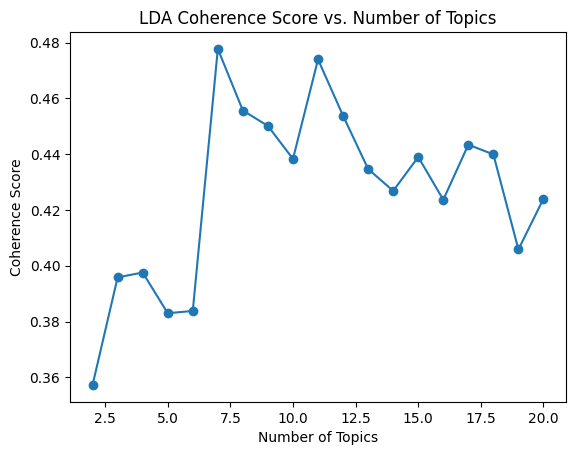

In [ ]:
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

# Tokenized documents (make sure your text is preprocessed)
tokenized_texts = cleaned_text

# Create dictionary and corpus
dictionary = Dictionary(tokenized_texts)
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

# Test different topic numbers
coherence_scores = []
topic_range = range(2, 21)  # Example: test 2 to 15 topics

best_num_topics = None
best_coherence_score = float('-inf')

for num_topics in topic_range:
    # Train LDA model
    lda_model = LdaModel(
        corpus=corpus, id2word=dictionary, num_topics=num_topics,
        random_state=42, passes=5, iterations=1000
    )
    coherence_model = CoherenceModel(
        model=lda_model, texts=tokenized_texts,
        dictionary=dictionary, coherence='c_v'
    )
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)

    # Print topic size and coherence score
    print(f"Num Topics: {num_topics}, Coherence Score: {coherence_score:.4f}")

    # Track the best performing size
    if coherence_score > best_coherence_score:
        best_coherence_score = coherence_score
        best_num_topics = num_topics

# Print the best performing topic size
print(f"\nBest Performing Num Topics: {best_num_topics}, Best Coherence Score: {best_coherence_score:.4f}")

# Plot coherence scores
plt.plot(topic_range, coherence_scores, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("LDA Coherence Score vs. Number of Topics")
plt.show()


In [ ]:
# Manually set number of topics
lda_topics_num=11

In [ ]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary

# Assuming you already have a corpus and dictionary
# corpus: a list of bag-of-words vectors (preprocessed text)
# dictionary: a gensim Dictionary object

# Tokenized documents (make sure your text is preprocessed)
tokenized_texts = cleaned_text

# Create dictionary and corpus
dictionary = Dictionary(tokenized_texts)
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

# Train the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=lda_topics_num, passes=5, iterations=1000, random_state=42)

# Print out the topics
topics = lda_model.print_topics(num_words=10)  # Adjust num_words if needed
for topic in topics:
    print(topic)


(0, '0.019*"mom" + 0.016*"parent" + 0.016*"famili" + 0.014*"live" + 0.011*"dad" + 0.010*"love" + 0.010*"tell" + 0.009*"mother" + 0.009*"peopl" + 0.009*"kid"')
(1, '0.055*"job" + 0.049*"work" + 0.026*"school" + 0.017*"colleg" + 0.016*"money" + 0.013*"home" + 0.013*"live" + 0.012*"studi" + 0.010*"pay" + 0.009*"parent"')
(2, '0.021*"anxieti" + 0.020*"help" + 0.011*"tri" + 0.010*"need" + 0.009*"work" + 0.008*"thought" + 0.007*"better" + 0.007*"bad" + 0.007*"therapi" + 0.006*"get"')
(3, '0.039*"eat" + 0.038*"sleep" + 0.020*"bed" + 0.018*"drink" + 0.017*"food" + 0.014*"night" + 0.012*"clean" + 0.012*"hour" + 0.009*"weight" + 0.009*"room"')
(4, '0.049*"mg" + 0.014*"pl" + 0.013*"mirtazapin" + 0.012*"scholarship" + 0.012*"syndrom" + 0.009*"twitter" + 0.008*"ship" + 0.007*"haha" + 0.007*"ib" + 0.007*"phrase"')
(5, '0.040*"km" + 0.018*"r" + 0.014*"til" + 0.013*"ur" + 0.012*"unattract" + 0.009*"overnight" + 0.008*"shall" + 0.008*"dentist" + 0.007*"pair" + 0.006*"spill"')
(6, '0.025*"fuck" + 0.020*

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

coherence_model = CoherenceModel(model=lda_model, texts=tokenized_texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f"Coherence Score: {coherence_score}")


Coherence Score: 0.4739690327903174


In [ ]:
def topic_diversity(model, top_n_words=10):
    unique_words = set()
    for topic in model.show_topics(num_topics=-1, num_words=top_n_words, formatted=False):
        unique_words.update([word for word, _ in topic[1]])
    return len(unique_words) / (model.num_topics * top_n_words)

diversity_score = topic_diversity(lda_model)
print(f"Topic Diversity: {diversity_score:.4f}")


Topic Diversity: 0.8727


In [ ]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis


PreparedData(topic_coordinates=            x       y  topics  cluster    Freq
topic                                         
10    -0.2233  0.0346       1        1 28.0916
6     -0.2273  0.0996       2        1 22.6652
2     -0.2144 -0.0597       3        1 20.1170
0     -0.1804  0.1491       4        1 11.6220
1     -0.1458  0.0157       5        1  7.6703
3     -0.0537 -0.1608       6        1  4.1563
9      0.0078 -0.2394       7        1  2.8573
8      0.1186  0.0447       8        1  1.2686
7      0.2910  0.0762       9        1  0.7856
4      0.3148  0.0205      10        1  0.3883
5      0.3126  0.0195      11        1  0.3777, topic_info=         Term      Freq     Total Category  logprob  loglift
75    thought 4092.0000 4092.0000  Default  30.0000  30.0000
43        job 3397.0000 3397.0000  Default  29.0000  29.0000
72     suicid 2305.0000 2305.0000  Default  28.0000  28.0000
363      work 5984.0000 5984.0000  Default  27.0000  27.0000
202      fuck 4465.0000 4465.0000  Default  26.0000  26.0000
...       ...       ...       ...      ...      ...      ...
1917  chicken   12.4274   41.0583  Topic11  -5.4158   4.3837
2178   heaven   12.7647   49.4637  Topic11  -5.3890   4.2242
1982    legal   13.4287   61.5910  Topic11  -5.3383   4.0557
9218    mourn   10.9124   41.8784  Topic11  -5.5458   4.2339
510      card    8.1582   90.1200  Topic11  -5.8367   3.1767

[749 rows x 6 columns], token_table=      Topic   Freq     Term
term                       
7090      6 0.9648       aa
3148      4 0.9786    abort
3932      6 0.1889      abt
3932      8 0.7936      abt
409       1 0.0265     abus
...     ...    ...      ...
1291      8 0.0144  younger
8468      1 0.9949     your
3243      3 0.9945   zoloft
1241      6 0.0166    zombi
1241      7 0.9766    zombi

[1934 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 7, 3, 1, 2, 4, 10, 9, 8, 5, 6])

In [ ]:
def topic_overlap(model, top_n_words=10):
    topic_words = [
        set([word for word, _ in model.show_topic(topic_id, top_n_words)])
        for topic_id in range(model.num_topics)
    ]
    overlap_count = sum(len(a & b) for i, a in enumerate(topic_words) for b in topic_words[i+1:])
    return overlap_count

overlap_score = topic_overlap(lda_model)
print(f"Topic Overlap Score: {overlap_score}")


Topic Overlap Score: 18


In [ ]:
import numpy as np

topic_distributions = [lda_model.get_document_topics(doc, minimum_probability=0) for doc in corpus]
topic_matrix = np.array([[prob for _, prob in doc] for doc in topic_distributions])

# Print average topic proportions across all documents
print("Average Topic Distribution per Document:")
print(topic_matrix.mean(axis=0))


Average Topic Distribution per Document:
[0.09372716 0.06608266 0.19711168 0.04896629 0.00768505 0.00740366
 0.26904038 0.01089077 0.01898927 0.03536823 0.24473464]


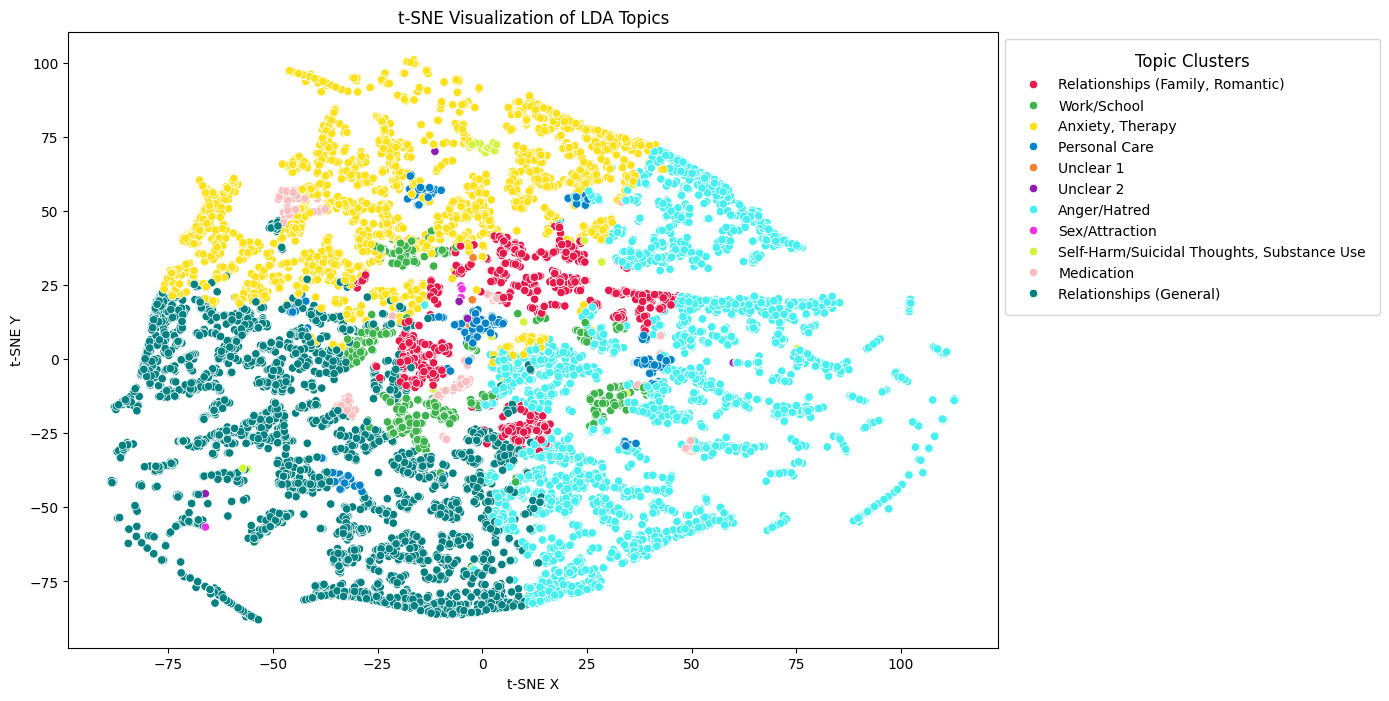

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from gensim.models import LdaModel
from gensim.corpora import Dictionary
import colorcet as cc

# Assuming you already have a corpus and dictionary
# corpus: a list of bag-of-words vectors (preprocessed text)
# dictionary: a gensim Dictionary object

# Tokenized documents (make sure your text is preprocessed)
tokenized_texts = cleaned_text  # Ensure this is the tokenized text, which has been preprocessed

# Create dictionary and corpus
dictionary = Dictionary(tokenized_texts)
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

# Train the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=lda_topics_num, passes=5, iterations=1000, random_state=42)

# Get document-topic distributions for all documents
doc_topic_matrix = [lda_model.get_document_topics(doc, minimum_probability=0) for doc in corpus]

# Convert the list of tuples to a 2D numpy array (each row is a document and each column is a topic)
doc_topic_matrix_2d = np.zeros((len(doc_topic_matrix), lda_topics_num))  # Initialize a 2D array

for i, doc in enumerate(doc_topic_matrix):
    for topic_num, prob in doc:
        doc_topic_matrix_2d[i, topic_num] = prob  # Fill the array with topic probabilities

# Apply t-SNE to reduce dimensionality for visualization
tsne_model = TSNE(n_components=2, random_state=42, perplexity=30)
reduced_embeddings = tsne_model.fit_transform(doc_topic_matrix_2d)

# Get the dominant topic for each document
dominant_topics = np.argmax(doc_topic_matrix_2d, axis=1)

# Create a DataFrame for Seaborn visualization
df_tsne = pd.DataFrame(reduced_embeddings, columns=["X", "Y"])
df_tsne["Topic"] = dominant_topics

tab11_colors = [
    "#E6194B", "#3CB44B", "#FFE119", "#0082C8", "#F58231",
    "#911EB4", "#46F0F0", "#F032E6", "#D2F53C", "#FABEBE", "#008080"
]

cluster_labels = {
    0: "Relationships (Family, Romantic)",
    1: "Work/School",
    2: "Anxiety, Therapy",
    3: "Personal Care",
    4: "Unclear 1",
    5: "Unclear 2",
    6: "Anger/Hatred",
    7: "Sex/Attraction",
    8: "Self-Harm/Suicidal Thoughts, Substance Use",
    9: "Medication",
    10: "Relationships (General)"
}

# Plot the t-SNE visualization
plt.figure(figsize=(12, 8))
sns.scatterplot(x="X", y="Y", hue=df_tsne["Topic"], palette=tab11_colors, data=df_tsne)
plt.title("t-SNE Visualization of LDA Topics")
plt.xlabel("t-SNE X")
plt.ylabel("t-SNE Y")
handles, labels = plt.gca().get_legend_handles_labels()
labels = [cluster_labels[int(label)] for label in labels]
plt.legend(handles, labels, title="Topic Clusters", bbox_to_anchor=(1, 1),
           title_fontsize='large', fontsize='medium', ncol=1, borderpad=1)
plt.show()

#### Top Representative Docuements

In [ ]:
import numpy as np

# Get document-topic distribution for each document
lda_doc_topics = [lda_model.get_document_topics(bow, minimum_probability=0) for bow in corpus]

# Convert to matrix form
lda_doc_topic_matrix = np.zeros((len(lda_doc_topics), lda_model.num_topics))  # Shape: (num_docs, num_topics)

for doc_idx, topics in enumerate(lda_doc_topics):
    for topic_num, prob in topics:
        lda_doc_topic_matrix[doc_idx, topic_num] = prob


In [ ]:
# Number of most representative documents per topic
top_n = 5

# Dictionary to store the most representative documents
most_representative_docs_lda = {}

for topic in range(lda_model.num_topics):
    top_doc_indices = np.argsort(lda_doc_topic_matrix[:, topic])[-top_n:]  # Get indices of top N docs
    most_representative_docs_lda[f"Topic_{topic}"] = top_doc_indices

# Convert to DataFrame for better readability
import pandas as pd
representative_lda_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in most_representative_docs_lda.items()]))
print(representative_lda_df)


   Topic_0  Topic_1  Topic_2  Topic_3  Topic_4  Topic_5  Topic_6  Topic_7  \
0     7049    14507     5752    14229      728      239     5142      129   
1     9945     8512    11618     7638     1049     6623     9636    13714   
2     5147    14060    12203    11015     8022     5211     1653     1678   
3     2708    15030     7655    11753      263    13711    13982     7744   
4     3311     3117     1221     5578      481    13396    14952     7721   

   Topic_8  Topic_9  Topic_10  
0     2813     4025      8862  
1      279     1602      4602  
2     5299     4480      8937  
3     5301     3020      5768  
4    14713    13627     14838  


In [ ]:
for topic, doc_indices in most_representative_docs_lda.items():
    print(f"\nMost Representative Documents for {topic}:")
    print(df_depression.loc[doc_indices, 'text'].values)  # Replace 'text' with your column name


Most Representative Documents for Topic_0:
["My Mom is really fucking mad at me. I got a 87.5 for science and she is really about to kill me. My best friend's mom saved me with a phone call but she looks ready to kill me. help please Please Help"
 'its just so funny how everything that comes my way i just spoil i just cannot take it anymore i do not want to spend the rest of my life picking up pieces of myself I have set the date 9/21 i will kill myself i chose that date not sooner because that is when i come back from boston after visiting my niece and nephew i just want to see them one last time. i ruin everything good for me'
 'please stop being mean or saying something to upset me, see me bothered, and then love bomb me, just say sorry. especially when you hurt me physically you just ignore it until i decide to be over it. i just need you to say sorry ): just tell me sorry'
 'I have learned to accept that my dad and I just do not get along. It used to make me feel really depressed

### NMF (TF-IDF)

In [ ]:
# Import additional libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from gensim.models.coherencemodel import CoherenceModel
import pandas as pd


In [ ]:
# Tried beta_loss='kullback-leibler' for Probabilistic Factorization; By default, NMF uses Euclidean distance.( produced lower coh. score)
#max_features=5000,  # Limit feature space for efficiency (did not produce better score)
#Fit NMF model : init="nndsvda" or init="nndsvd" (experimented with both)
# Step 1: Convert cleaned text into a list of strings for TF-IDF
cleaned_text_strings = [" ".join(tokens) for tokens in cleaned_text]

# Step 2: Apply TF-IDF transformation
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95,  # Ignore words appearing in more than 95% of docs
    min_df=2, # Ignore words appearing in fewer than 5 docs (2-5)
    norm='l2', # Normalize to avoid bias towards long documents
    #max_features=5000,  # Limit feature space for efficiency
    stop_words='english'
)

tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_text_strings)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# Step 3: Create Gensim Dictionary for coherence calculation
dictionary = Dictionary(cleaned_text)

# Step 4: Define range of topics to test
topic_range = range(8, 20)  # Adjust based on dataset size

best_coherence_score = float('-inf')
best_num_topics = None
results = []

# Try beta_loss='kullback-leibler' for Probabilistic Factorization; By default, NMF uses Euclidean distance.
for num_topics in topic_range:
    # Step 5: Fit NMF model : init="nndsvda" or init="nndsvd"
    nmf_model = NMF(n_components=num_topics, random_state=42, init="nndsvda", max_iter=1000)
    W = nmf_model.fit_transform(tfidf_matrix)
    H = nmf_model.components_

    # Step 6: Extract topics
    topics = []
    for topic_idx, topic in enumerate(H):
        top_words = [tfidf_feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]  # Top 10 words
        topics.append(top_words)

    # Step 7: Compute coherence score using Gensim
    #other option: coherence='u_mass'(produced negative coherence score)
    coherence_model = CoherenceModel(
        topics=topics, texts=cleaned_text, dictionary=dictionary, coherence='c_v'
    )
    coherence_score = coherence_model.get_coherence()

    # Store results
    results.append((num_topics, coherence_score))
    print(f"Num Topics: {num_topics}, Coherence Score: {coherence_score:.4f}")

    # Track best model
    if coherence_score > best_coherence_score:
        best_coherence_score = coherence_score
        best_num_topics = num_topics
        best_nmf_model = nmf_model  # Store best NMF model

# Step 8: Print best-performing model
print(f"\nBest Performing Num Topics: {best_num_topics}, Best Coherence Score: {best_coherence_score:.4f}")

# Convert results to a DataFrame for visualization
results_df = pd.DataFrame(results, columns=["Num_Topics", "Coherence_Score"])


Num Topics: 8, Coherence Score: 0.4824
Num Topics: 9, Coherence Score: 0.4825
Num Topics: 10, Coherence Score: 0.4795
Num Topics: 11, Coherence Score: 0.4840
Num Topics: 12, Coherence Score: 0.4767
Num Topics: 13, Coherence Score: 0.4755
Num Topics: 14, Coherence Score: 0.4746
Num Topics: 15, Coherence Score: 0.4715
Num Topics: 16, Coherence Score: 0.4714
Num Topics: 17, Coherence Score: 0.4612
Num Topics: 18, Coherence Score: 0.4671
Num Topics: 19, Coherence Score: 0.4629

Best Performing Num Topics: 11, Best Coherence Score: 0.4840


In [ ]:
# Tried beta_loss='kullback-leibler' for Probabilistic Factorization; By default, NMF uses Euclidean distance.( produced lower coh. score)
#max_features=5000,  # Limit feature space for efficiency (did not produce better score)
#Fit NMF model : init="nndsvda" or init="nndsvd" (experimented with both)
# Step 1: Convert cleaned text into a list of strings for TF-IDF
cleaned_text_strings = [" ".join(tokens) for tokens in cleaned_text]

# Step 2: Apply TF-IDF transformation
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95,  # Ignore words appearing in more than 95% of docs
    min_df=2, # Ignore words appearing in fewer than 5 docs (2-5)
    norm='l2', # Normalize to avoid bias towards long documents
    #max_features=5000,  # Limit feature space for efficiency
    stop_words='english'
)

tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_text_strings)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# Step 3: Create Gensim Dictionary for coherence calculation
dictionary = Dictionary(cleaned_text)

# Step 4: Define range of topics to test
topic_range = range(11, 12)  # Adjust based on dataset size

best_coherence_score = float('-inf')
best_num_topics = None
results = []

# Try beta_loss='kullback-leibler' for Probabilistic Factorization; By default, NMF uses Euclidean distance.
for num_topics in topic_range:
    # Step 5: Fit NMF model : init="nndsvda" or init="nndsvd"
    nmf_model = NMF(n_components=num_topics, random_state=42, init="nndsvda", max_iter=1000)
    W = nmf_model.fit_transform(tfidf_matrix)
    H = nmf_model.components_

    # Step 6: Extract topics
    topics = []
    for topic_idx, topic in enumerate(H):
        top_words = [tfidf_feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]  # Top 10 words
        topics.append(top_words)

    # Step 7: Compute coherence score using Gensim
    #other option: coherence='u_mass'(produced negative coherence score)
    coherence_model = CoherenceModel(
        topics=topics, texts=cleaned_text, dictionary=dictionary, coherence='c_v'
    )
    coherence_score = coherence_model.get_coherence()

    # Store results
    results.append((num_topics, coherence_score))
    print(f"Num Topics: {num_topics}, Coherence Score: {coherence_score:.4f}")

    # Track best model
    if coherence_score > best_coherence_score:
        best_coherence_score = coherence_score
        best_num_topics = num_topics
        best_nmf_model = nmf_model  # Store best NMF model

# Step 8: Print best-performing model
print(f"\nBest Performing Num Topics: {best_num_topics}, Best Coherence Score: {best_coherence_score:.4f}")

# Convert results to a DataFrame for visualization
results_df = pd.DataFrame(results, columns=["Num_Topics", "Coherence_Score"])


Num Topics: 11, Coherence Score: 0.4822

Best Performing Num Topics: 11, Best Coherence Score: 0.4822


In [ ]:
# Step 9: Display topics for best model
def display_nmf_topics(model, feature_names, num_top_words=10):
    """Prints the top words for each NMF topic."""
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]
        print(f"Topic {topic_idx + 1}: {', '.join(top_words)}\n")

print("\nTop words for the best NMF model:")
display_nmf_topics(best_nmf_model, tfidf_feature_names)



Top words for the best NMF model:
Topic 1: tri, thought, better, happi, way, feel, bad, felt, stop, sad

Topic 2: fuck, shit, god, stupid, sick, right, kill, suck, man, world

Topic 3: friend, talk, famili, lone, school, best, girl, hang, group, social

Topic 4: help, need, therapi, tell, ask, therapist, mental, advic, medic, health

Topic 5: work, job, home, school, live, money, colleg, pay, new, hour

Topic 6: hate, wish, bodi, exist, sad, stop, wake, happi, look, point

Topic 7: tire, sleep, wish, wake, exhaust, bed, night, exist, hour, everyday

Topic 8: die, live, kill, suicid, aliv, death, world, exist, pain, wish

Topic 9: anxieti, attack, panic, heart, break, symptom, anxiou, stress, medic, health

Topic 10: peopl, care, person, world, social, understand, live, look, human, tell

Topic 11: love, pain, hurt, wish, heart, break, lose, relationship, trauma, care



Topics summary:
1. Emotional Struggles
2. Anger & Frustration – negative emotions
3. Loneliness & Social Struggles – Issues with friendships, family, and social isolation.
4. Seeking Help & Mental Health Support – Therapy, medication, professional help, and mental health discussions.
5. Work, School & Financial Stress – Struggles with employment, school pressure, financial burdens.
6. Self-Hate / Existential Struggles – Negative self-image, dissatisfaction with life, questioning purpose.
7. Exhaustion & Sleep Issues – Feeling constantly tired, struggling with sleep, daily exhaustion.
8. Suicidal Thoughts & Existential Crisis – Thoughts of death, questioning existence, deep despair.
9. Anxiety & Panic Attacks – Physical and mental symptoms of anxiety, stress, and health concerns.
10. Social Perception & Understanding – Feeling misunderstood, struggles with people and society.
11. Love & Relationships – Heartbreak, emotional pain, trauma, and relationship struggles.

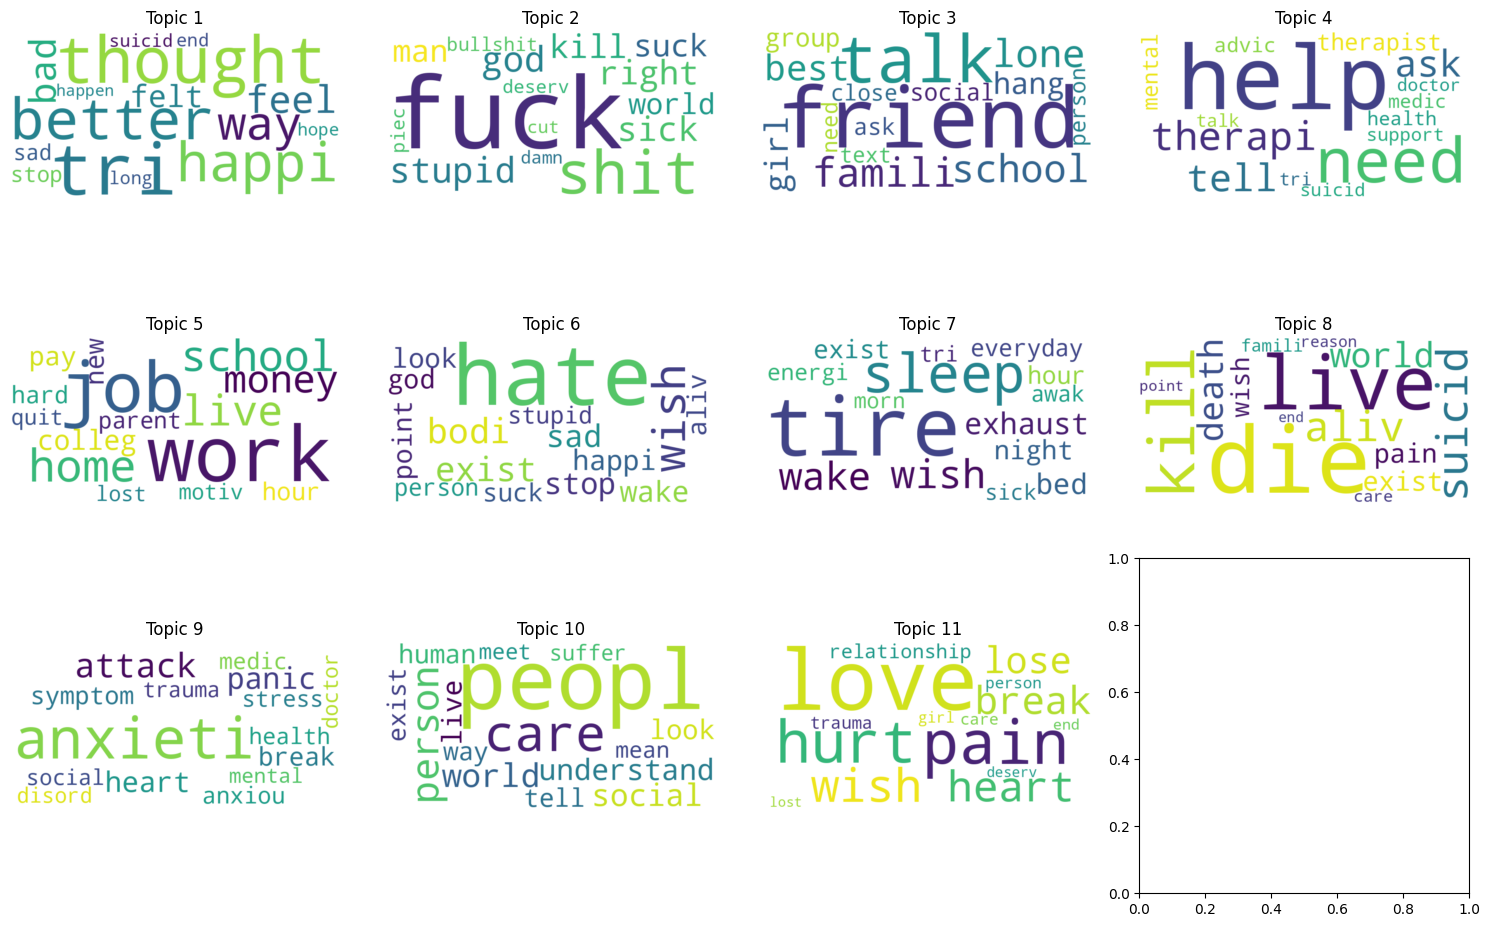

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Get the feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Generate word clouds
fig, axes = plt.subplots(3, 4, figsize=(15, 10))  # 3 rows, 4 columns for 11 topics
axes = axes.flatten()

for i, topic in enumerate(best_nmf_model.components_):
    if i >= len(axes):
        break
    topic_words = {feature_names[j]: topic[j] for j in topic.argsort()[:-15 - 1:-1]}  # Top 15 words
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(topic_words)

    axes[i].imshow(wordcloud, interpolation="bilinear")
    axes[i].set_title(f"Topic {i+1}")
    axes[i].axis("off")

plt.tight_layout()
plt.show()


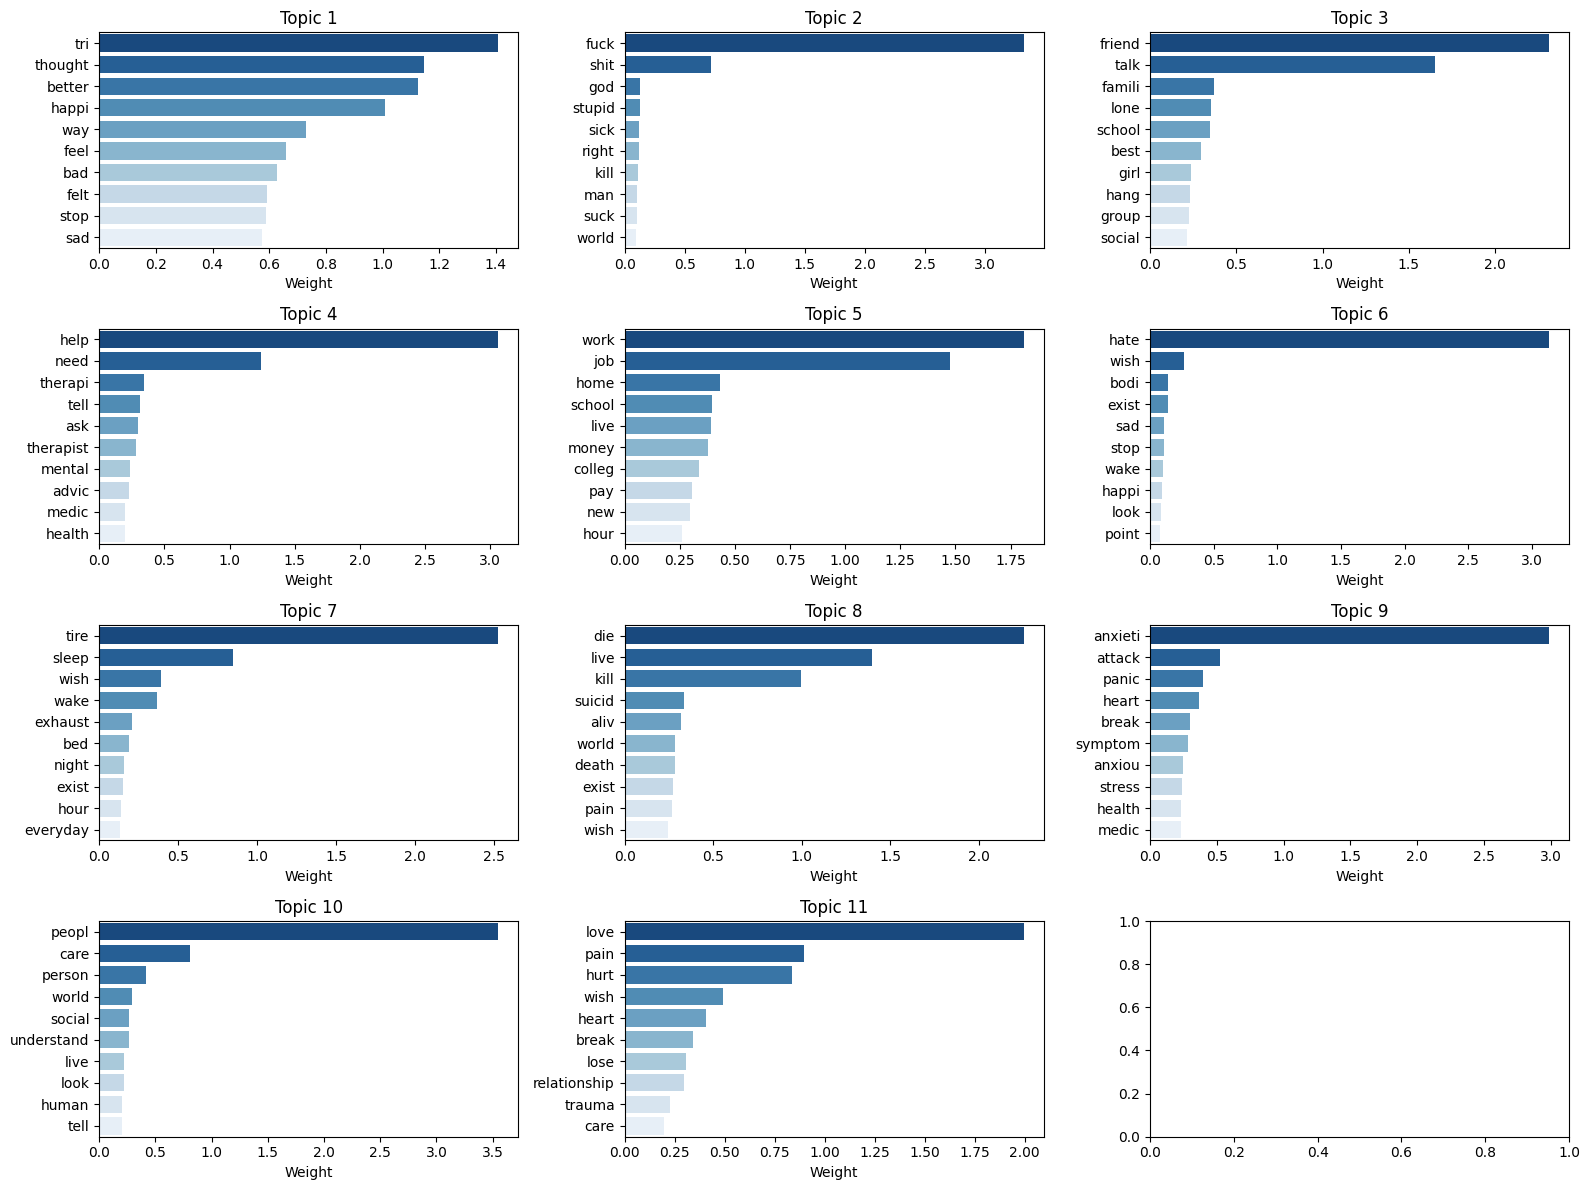

In [ ]:
import seaborn as sns

num_top_words = 10  # Number of top words to display per topic
num_topics = best_nmf_model.n_components_

fig, axes = plt.subplots(4, 3, figsize=(16, 12))  # Adjust grid size for number of topics
axes = axes.flatten()

for i, topic in enumerate(best_nmf_model.components_):
    if i >= len(axes):
        break
    top_indices = topic.argsort()[:-num_top_words - 1:-1]  # Get top word indices
    top_words = [feature_names[j] for j in top_indices]
    top_scores = topic[top_indices]

    sns.barplot(x=top_scores, y=top_words, ax=axes[i], palette="Blues_r")
    axes[i].set_title(f"Topic {i+1}")
    axes[i].set_xlabel("Weight")

plt.tight_layout()
plt.show()


Text(0.5, 58.7222222222222, 'Topics')

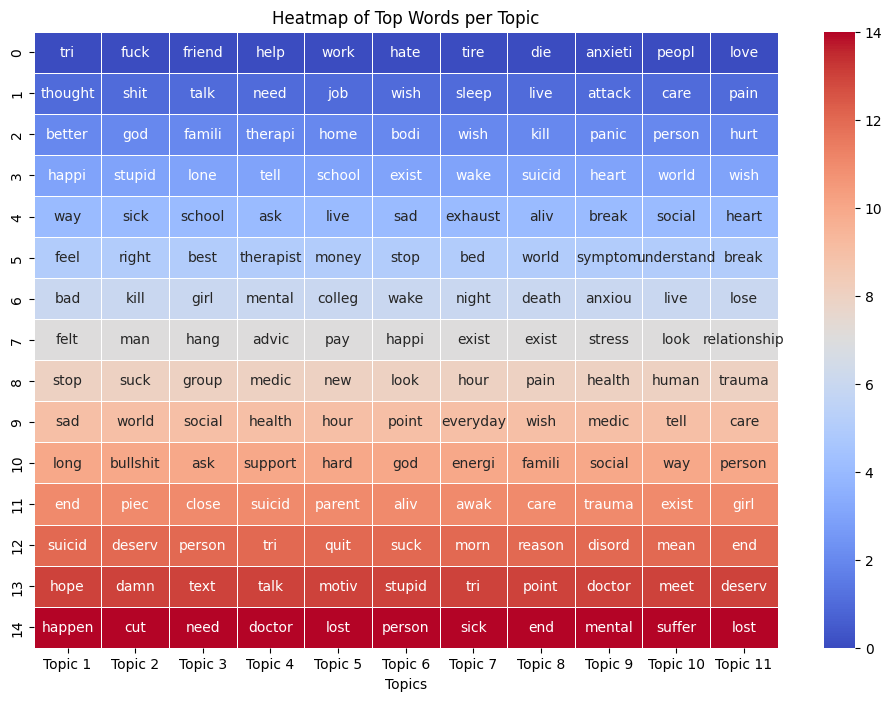

In [ ]:
import pandas as pd
import seaborn as sns

num_top_words = 15  # Adjust to display more words

# Get top words for each topic
topic_words = []
for topic in best_nmf_model.components_:
    top_indices = topic.argsort()[:-num_top_words - 1:-1]  # Get top word indices
    top_words = [feature_names[i] for i in top_indices]
    topic_words.append(top_words)

# Convert to DataFrame
df_topic_words = pd.DataFrame(topic_words).T
df_topic_words.columns = [f"Topic {i+1}" for i in range(len(topic_words))]

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_topic_words.apply(lambda x: pd.factorize(x)[0]), annot=df_topic_words, fmt="", cmap="coolwarm", linewidths=.5)
plt.title("Heatmap of Top Words per Topic")
plt.xlabel("Topics")


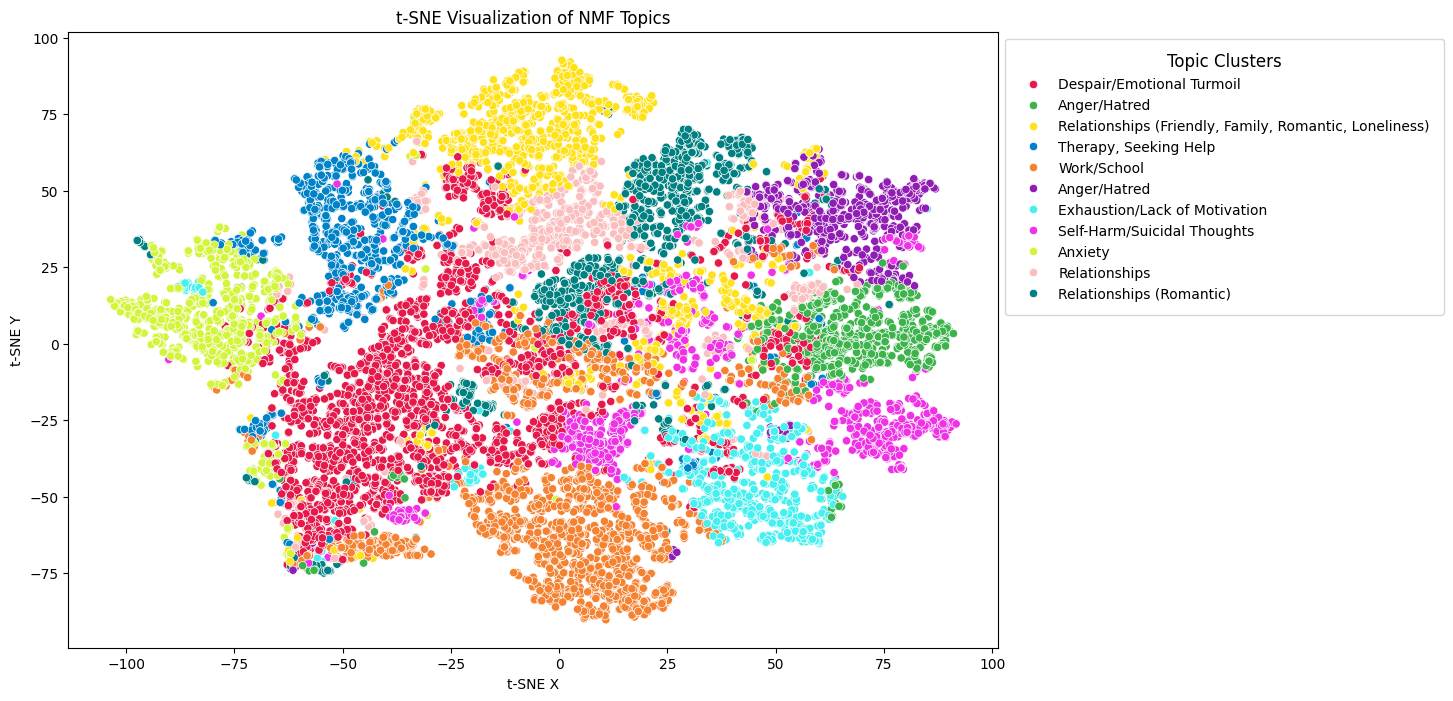

In [ ]:
from sklearn.manifold import TSNE

# Reduce dimensions
tsne_model = TSNE(n_components=2, random_state=42, perplexity=30)
doc_topic_matrix = best_nmf_model.transform(tfidf_matrix)
tsne_embeddings = tsne_model.fit_transform(doc_topic_matrix)

# Convert to DataFrame
df_tsne = pd.DataFrame(tsne_embeddings, columns=["X", "Y"])
df_tsne["Topic"] = doc_topic_matrix.argmax(axis=1)

tab11_colors = [
    "#E6194B", "#3CB44B", "#FFE119", "#0082C8", "#F58231",
    "#911EB4", "#46F0F0", "#F032E6", "#D2F53C", "#FABEBE", "#008080"
]

cluster_labels = {
    0: "Despair/Emotional Turmoil",
    1: "Anger/Hatred",
    2: "Relationships (Friendly, Family, Romantic, Loneliness)",
    3: "Therapy, Seeking Help",
    4: "Work/School",
    5: "Anger/Hatred",
    6: "Exhaustion/Lack of Motivation",
    7: "Self-Harm/Suicidal Thoughts",
    8: "Anxiety",
    9: "Relationships",
    10: "Relationships (Romantic)"
}

# Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x="X", y="Y", hue=df_tsne["Topic"], palette=tab11_colors, data=df_tsne)
plt.title("t-SNE Visualization of NMF Topics")
plt.xlabel("t-SNE X")
plt.ylabel("t-SNE Y")
handles, labels = plt.gca().get_legend_handles_labels()
labels = [cluster_labels[int(label)] for label in labels]
plt.legend(handles, labels, title="Topic Clusters", bbox_to_anchor=(1, 1),
           title_fontsize='large', fontsize='medium', ncol=1, borderpad=1)
plt.show()

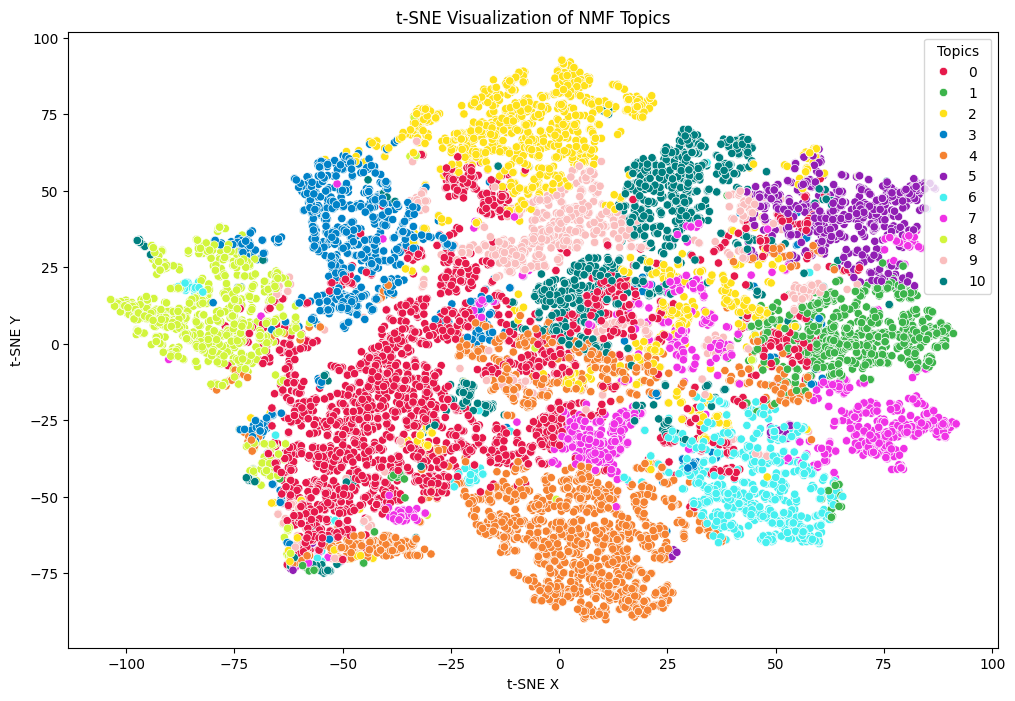

Next step: Identify Similar Topics and merge

Manual inspection:
Possible Overlaps

Topic 1 (Emotional Struggles) & Topic 6 (Self-Hate & Existential Struggles)
Both mention "feel," "sad," "stop," "wish" → Consider merging.

Topic 5 (Work/School Stress) & Topic 3 (Social Struggles)
Both mention "school," "live," "money," "colleg" → Might have shared concerns.

Topic 8 (Suicidal Thoughts) & Topic 6 (Self-Hate)
Both mention "die," "exist," "pain," "wish" → Similar but nuanced.

Topic 7 (Exhaustion & Sleep) & Topic 1 (Emotional Struggles

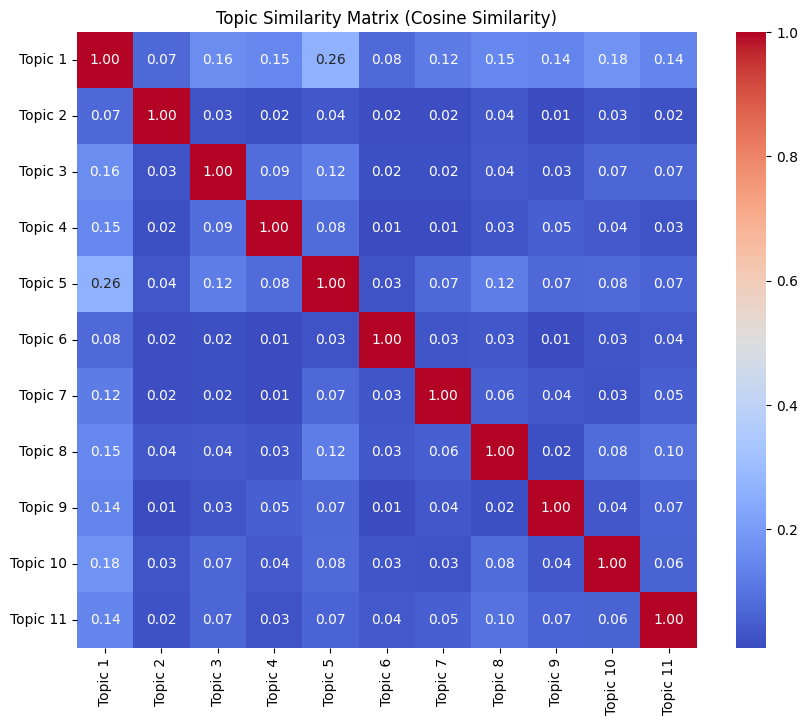

In [ ]:
#Check Topic Similarity (Identify Overlapping Topics)
#High cosine similarity (above 0.7-0.8) between topics → Possible overlap.
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np

# Compute cosine similarity between topics
topic_similarities = cosine_similarity(best_nmf_model.components_)

# Convert to DataFrame for better readability
topic_sim_df = pd.DataFrame(topic_similarities,
                            index=[f"Topic {i+1}" for i in range(best_nmf_model.n_components)],
                            columns=[f"Topic {i+1}" for i in range(best_nmf_model.n_components)])

# Display similarity matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(topic_sim_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Topic Similarity Matrix (Cosine Similarity)")
plt.show()


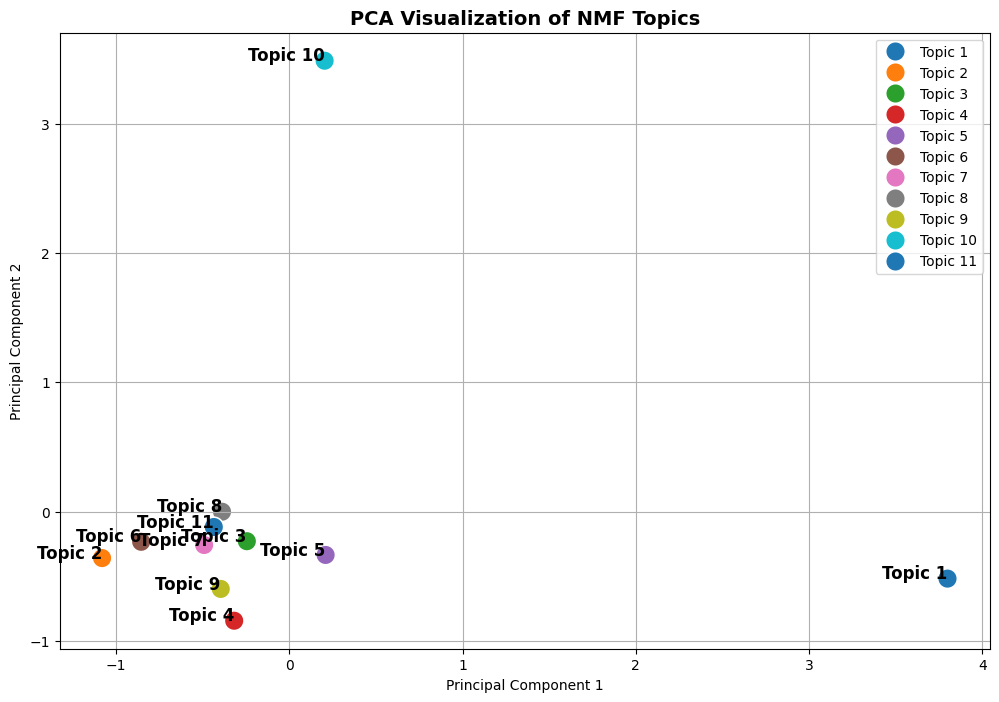

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce dimensionality of topic embeddings
pca = PCA(n_components=2, random_state=42)
topic_pca = pca.fit_transform(best_nmf_model.components_)

# Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x=topic_pca[:, 0], y=topic_pca[:, 1], hue=[f"Topic {i+1}" for i in range(len(topic_pca))],
                palette="tab20", s=200)

for i, (x, y) in enumerate(topic_pca):
    plt.text(x, y, f"Topic {i+1}", fontsize=12, ha='right', fontweight='bold')

plt.title("PCA Visualization of NMF Topics", fontsize=14, fontweight='bold')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


#### Manual Inspections

In [ ]:
import numpy as np
import pandas as pd

# Get topic-document weights (W matrix from NMF)
W = best_nmf_model.transform(tfidf_matrix)

# Convert to DataFrame for easier manipulation
W_df = pd.DataFrame(W, columns=[f"Topic_{i}" for i in range(W.shape[1])])
W_df['Document_Index'] = W_df.index  # Store original index


In [ ]:
# Number of top representative documents per topic
top_n = 5

# Dictionary to store the most representative documents
most_representative_docs = {}

for topic in range(W.shape[1]):
    top_doc_indices = W_df.nlargest(top_n, f"Topic_{topic}")['Document_Index'].values
    most_representative_docs[f"Topic_{topic}"] = top_doc_indices

# Convert to DataFrame for better readability
representative_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in most_representative_docs.items()]))
print(representative_df)


   Topic_0  Topic_1  Topic_2  Topic_3  Topic_4  Topic_5  Topic_6  Topic_7  \
0    14828     6198     3948    11726     4205     6248      287    13781   
1     3860    10920    13469    13194     8210     9329     5354     2399   
2     2394    13854     3530    13481    10778    13960     2238     3660   
3      549    11176     3621    14797     2012    14930     6776      187   
4    10745     9472     7923     9922    11234    12828     2921     9281   

   Topic_8  Topic_9  Topic_10  
0    13307     7925     12517  
1    13358    13785      6480  
2    13377     5885     13236  
3    13388     4583       924  
4    13461     4697      8783  


In [ ]:
for topic, doc_indices in most_representative_docs.items():
    print(f"\nMost Representative Documents for {topic}:")
    print(df_depression.loc[doc_indices, 'text'].values)  # Replace 'text' with your column name



Most Representative Documents for Topic_0:
["Battling with intrusive thoughts Tw: (thoughts of) self harm, drug abuse, suicidal thoughts \n(m/22, if you care)\n\n\nFirst things first, I really need to vent right now and dont know if anyone is even gonna read that but I just need to get this out of my head.\nAnd sorry, if my english isn't good...\n\nSo, I've been battling depression for over a decade, I've mostly gotten better after years of therapy and carefully choosing the people around me so I've been pretty stable for a few years with less and less backlashes.\n\nToday marks the first day after about 3 years where I'm getting extremely intense thoughts about self harming, drug abuse and even suicidal thoughts.\n\nI've already been in a pretty bad mood today, overthinking a lot and shit like that and I had to go to social event I didn't really wanna take part in but usually it turns out better than expected. It wasn't like that today. I've felt even worse and useless (despite my fr

## Comparison Metrics

### Coherence Scores (which technically already have for LDA and NMF, but might be good to do them all at once here)

#### BERTopic

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary

# Assuming `topic_model` is already your trained BERTopic model
# and `df_depression` contains the raw text data in a column called 'text'

# Step 1: Get topics from BERTopic
topics = topic_model.get_topics()

# Step 2: Tokenize your raw text (using word_tokenize from NLTK as discussed)
# Tokenizing raw text
tokenized_texts = [nltk.word_tokenize(doc) for doc in df_depression["text"]]

# Step 3: Create a Gensim dictionary from your tokenized texts
dictionary = Dictionary(tokenized_texts)

# Step 4: Prepare the list of words for each topic (from BERTopic)
topic_words = [[word for word, _ in topic] for topic in topics.values()]

# Step 5: Create a Gensim CoherenceModel
coherence_model = CoherenceModel(
    topics=topic_words,
    texts=tokenized_texts,
    dictionary=dictionary,
    coherence='c_v'  # You can also use 'u_mass', 'c_v', etc.
)

# Step 6: Get the coherence score
bertopic_coherence_score = coherence_model.get_coherence()

print(f"Coherence Score: {bertopic_coherence_score}")


Coherence Score: 0.4744163202984992


#### LDA

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

coherence_model = CoherenceModel(model=lda_model, texts=tokenized_texts, dictionary=dictionary, coherence='c_v')
lda_coherence_score = coherence_model.get_coherence()
print(f"Coherence Score: {lda_coherence_score}")


Coherence Score: 0.46562127647022783


#### NMF

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary

def calculate_nmf_coherence(model, texts, feature_names, coherence='c_v'):
    """
    Computes the coherence score for an NMF model.

    Parameters:
    - model: Trained NMF model
    - texts: Tokenized cleaned text (list of lists of words)
    - feature_names: List of feature names from the TF-IDF vectorizer
    - coherence: Coherence metric ('c_v', 'u_mass', 'c_npmi', etc.)

    Returns:
    - Coherence score
    """
    # Create dictionary
    dictionary = Dictionary(texts)
    dictionary.filter_extremes(no_below=2, no_above=0.95)

    # Extract topics
    topics = []
    for topic in model.components_:
        top_words = [feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]
        topics.append(top_words)

    # Compute coherence score
    coherence_model = CoherenceModel(
        topics=topics, texts=texts, dictionary=dictionary, coherence=coherence
    )
    coherence_score = coherence_model.get_coherence()

    return coherence_score

# Example usage:
nmf_coherence_score = calculate_nmf_coherence(best_nmf_model, cleaned_text, tfidf_feature_names, coherence='c_v')
print(f"NMF Coherence Score: {nmf_coherence_score:.4f}")


NMF Coherence Score: 0.4822


#### Visualize

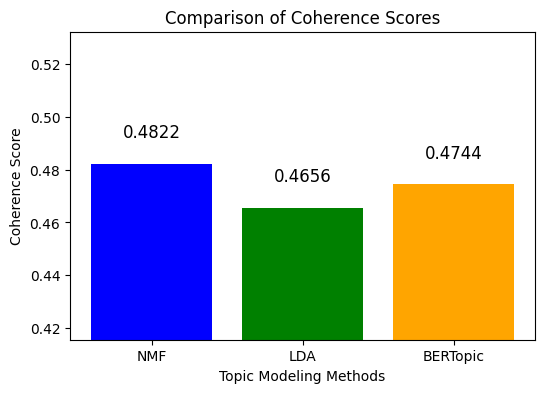

In [ ]:
import matplotlib.pyplot as plt

# Define model names and coherence scores
models = ['NMF', 'LDA', 'BERTopic']
scores = [nmf_coherence_score, lda_coherence_score, bertopic_coherence_score]

# Create the bar chart
plt.figure(figsize=(6, 4))
plt.bar(models, scores, color=['blue', 'green', 'orange'])

# Add labels and title
plt.xlabel("Topic Modeling Methods")
plt.ylabel("Coherence Score")
plt.title("Comparison of Coherence Scores")

# Display values on top of bars
for i, score in enumerate(scores):
    plt.text(i, score + 0.01, f"{score:.4f}", ha='center', fontsize=12)

# Show the plot
plt.ylim(min(scores) - 0.05, max(scores) + 0.05)  # Adjust y-axis for better visibility
plt.show()


### Diversity Scores- Measures how distinct the top words in each topic are

#### BERTopic

In [ ]:
import numpy as np

def calculate_topic_diversity(model, top_n_words=10):
    """
    Computes topic diversity for a BERTopic model.

    Parameters:
    - model: A trained BERTopic model
    - top_n_words: Number of top words to consider per topic (default: 10)

    Returns:
    - Topic diversity score (float between 0 and 1)
    """
    topics = model.get_topics()
    topic_words = [ [word for word, _ in topics[i][:top_n_words]] for i in topics.keys() if i != -1]  # Ignore outlier topic (-1)

    unique_words = set(np.concatenate(topic_words))
    total_words = len(topic_words) * top_n_words

    diversity_score = len(unique_words) / total_words
    return diversity_score

# Example usage:
bertopic_diversity_score = calculate_topic_diversity(topic_model, top_n_words=10)
print(f"BERTopic Diversity Score: {bertopic_diversity_score:.4f}")


BERTopic Diversity Score: 0.7462


#### LDA

In [ ]:
def topic_diversity(model, top_n_words=10):
    unique_words = set()
    for topic in model.show_topics(num_topics=-1, num_words=top_n_words, formatted=False):
        unique_words.update([word for word, _ in topic[1]])
    return len(unique_words) / (model.num_topics * top_n_words)

lda_diversity_score = topic_diversity(lda_model)
print(f"Topic Diversity: {lda_diversity_score:.4f}")


Topic Diversity: 0.8727


#### NMF

In [ ]:
import numpy as np

def calculate_nmf_diversity(model, feature_names, top_n_words=10):
    """
    Computes topic diversity for an NMF model.

    Parameters:
    - model: A trained NMF model
    - feature_names: List of feature names from TfidfVectorizer
    - top_n_words: Number of top words to consider per topic (default: 10)

    Returns:
    - Topic diversity score (float between 0 and 1)
    """
    topic_words = [
        [feature_names[i] for i in topic.argsort()[:-top_n_words - 1:-1]]
        for topic in model.components_
    ]

    unique_words = set(np.concatenate(topic_words))
    total_words = len(topic_words) * top_n_words

    diversity_score = len(unique_words) / total_words
    return diversity_score

# Example usage:
nmf_diversity_score = calculate_nmf_diversity(best_nmf_model, tfidf_feature_names, top_n_words=10)
print(f"NMF Diversity Score: {nmf_diversity_score:.4f}")


NMF Diversity Score: 0.7727


#### Visualize

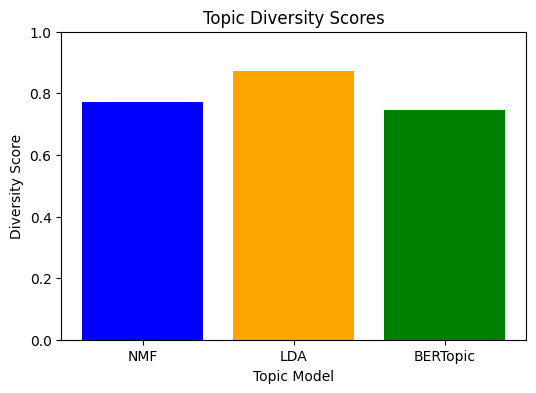

In [ ]:
# Topic diversity scores
diversity_scores = [nmf_diversity_score, lda_diversity_score, bertopic_diversity_score]

plt.figure(figsize=(6, 4))
plt.bar(models, diversity_scores, color=['blue', 'orange', 'green'])
plt.xlabel("Topic Model")
plt.ylabel("Diversity Score")
plt.title("Topic Diversity Scores")
plt.ylim(0, 1)  # Diversity score is between 0 and 1
plt.show()


### Both in a Bar Chart

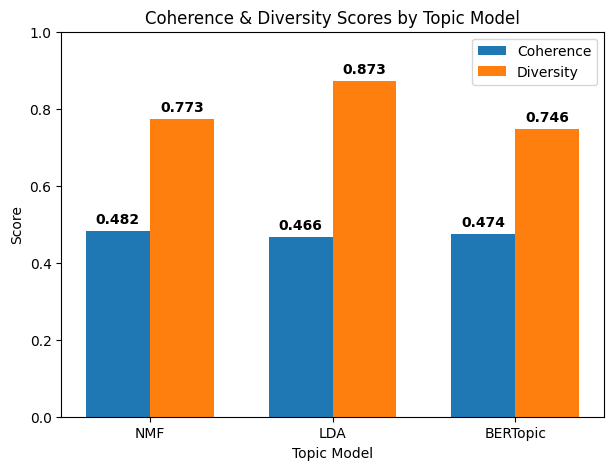

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data
models = ["NMF", "LDA", "BERTopic"]
coherence_scores = [nmf_coherence_score, lda_coherence_score, bertopic_coherence_score]
diversity_scores = [nmf_diversity_score, lda_diversity_score, bertopic_diversity_score]

# Bar width and positions
x = np.arange(len(models))  # Label locations
bar_width = 0.35  # Width of bars

# Create figure
plt.figure(figsize=(7, 5))

# Plot bars
bars1 = plt.bar(x - bar_width/2, coherence_scores, bar_width, label="Coherence")
bars2 = plt.bar(x + bar_width/2, diversity_scores, bar_width, label="Diversity")

# Annotate bars with values
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f"{bar.get_height():.3f}", ha='center', fontsize=10, fontweight='bold')

for bar in bars2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f"{bar.get_height():.3f}", ha='center', fontsize=10, fontweight='bold')

# Labels and title
plt.xlabel("Topic Model")
plt.ylabel("Score")
plt.title("Coherence & Diversity Scores by Topic Model")
plt.xticks(x, models)  # Set x-tick labels
plt.ylim(0, 1.00)  # Set y-limit to 1.00
plt.legend()

# Show plot
plt.show()


### Qualitative Portion

#### Checkmark Chart

In [ ]:
# Chose to handle this manually in Excel

#### Histogram

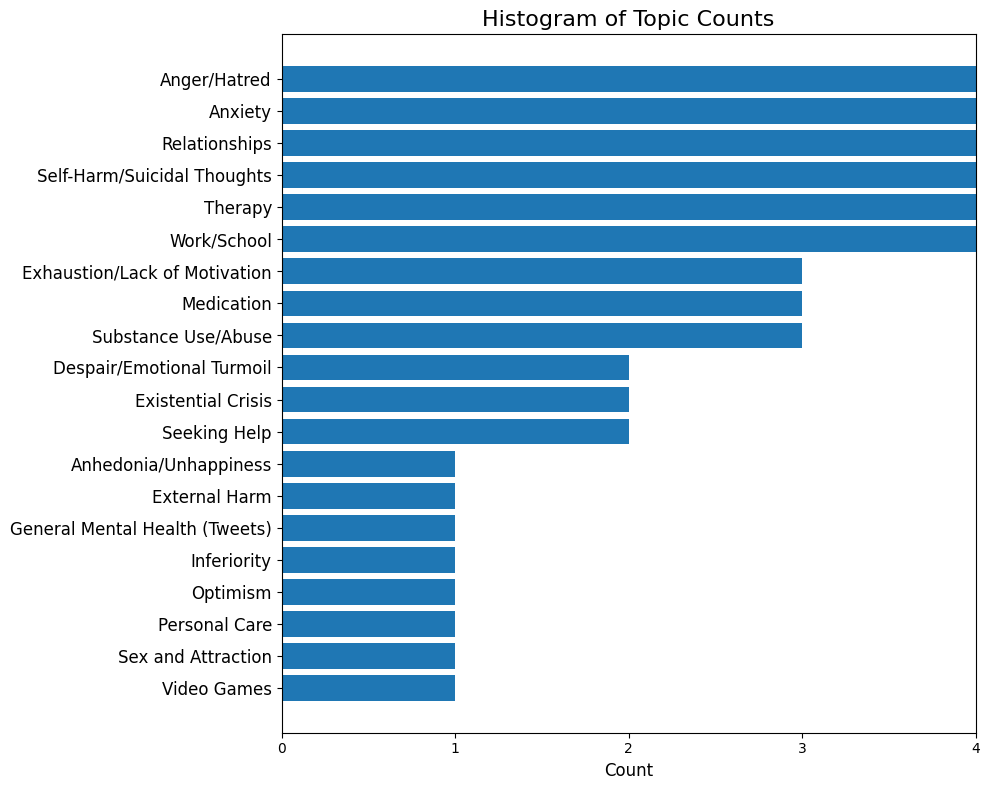

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data
data = {
    "Topic": [
        "Anger/Hatred",
        "Anhedonia/Unhappiness",
        "Anxiety",
        "Despair/Emotional Turmoil",
        "Exhaustion/Lack of Motivation",
        "Existential Crisis",
        "External Harm",
        "General Mental Health (Tweets)",
        "Inferiority",
        "Medication",
        "Optimism",
        "Personal Care",
        "Relationships",
        "Seeking Help",
        "Self-Harm/Suicidal Thoughts",
        "Sex and Attraction",
        "Substance Use/Abuse",
        "Therapy",
        "Video Games",
        "Work/School"
    ],
    "Count": [
        4, 1, 4, 2, 3, 2, 1, 1, 1, 3, 1, 1, 4, 2, 4, 1, 3, 4, 1, 4
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Sort DataFrame by 'Count' in descending order
df = df.sort_values(by=['Count', 'Topic'], ascending=[True, False])

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(df['Topic'], df['Count'])
plt.xlabel('Count', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Histogram of Topic Counts', fontsize=16)
plt.xlim(0, df['Count'].max())  # Set x-axis limit to improve readability

# Set x-ticks to only show whole numbers
plt.xticks(np.arange(0, df['Count'].max()+1, 1))  # Adjust the step as needed

# Show the plot
plt.tight_layout()
plt.show()

#### Percent of Manual Topics found

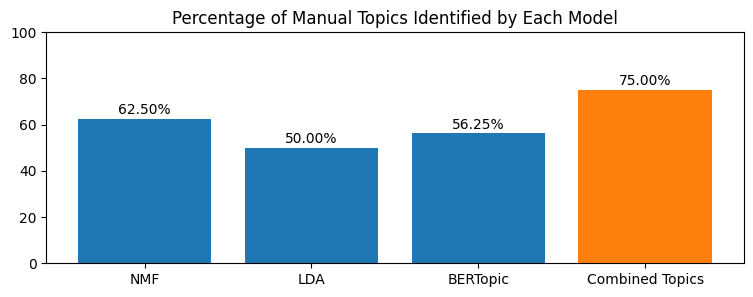

In [ ]:
import matplotlib.pyplot as plt

# Data
models = ["NMF", "LDA", "BERTopic", "Combined Topics"]
manual_count = 16
nmf_and_manual_count = 10
lda_and_manual_count = 8
bertopic_and_manual_count = 9
combined_count = 12
percentages = [
    nmf_and_manual_count / manual_count * 100,
    lda_and_manual_count / manual_count * 100,
    bertopic_and_manual_count / manual_count * 100,
    combined_count / manual_count * 100
]

# Define colors: All bars are blue except the last one (red)
colors = ["C0", "C0", "C0", "C1"]

# Create bar chart with specific colors
plt.figure(figsize=(9, 3))
plt.bar(models, percentages, color=colors)

# Labels and title
plt.title("Percentage of Manual Topics Identified by Each Model")
plt.ylim(0, 100)

# Show values on top of bars
for i, v in enumerate(percentages):
    plt.text(i, v + 2, f"{v:.2f}%", ha='center', fontsize=10)

# Show plot
plt.show()


# Abstract Topics


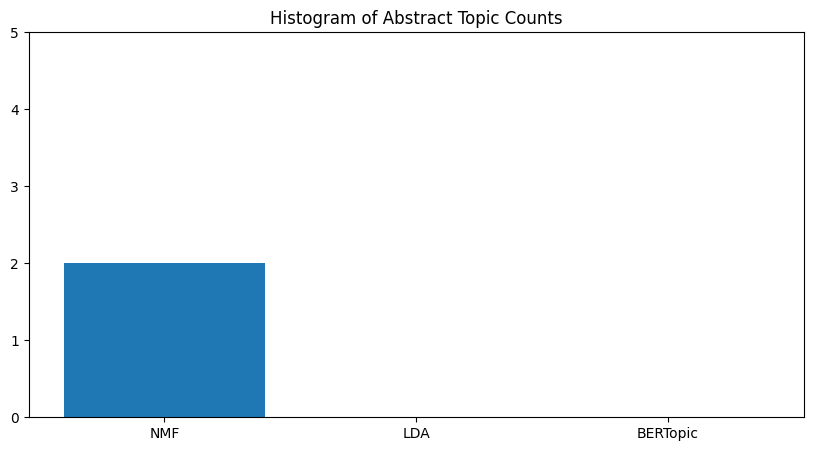

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data
data = {
    "Model": [
        "NMF",
        "LDA",
        "BERTopic"
    ],
    "Count": [
        2, 0, 0
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(df['Model'], df['Count'])
plt.title('Histogram of Abstract Topic Counts')
plt.yticks([0,1,2,3,4,5])
plt.ylim(0, 5)  # Set x-axis limit to improve readability

# Set x-ticks to only show whole numbers
plt.xticks(np.arange(0, df['Count'].max()+1, 1))  # Adjust the step as needed

# Show the plot
plt.show()